In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Mengatur tampilan visualisasi
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style='whitegrid')

In [9]:
# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/DigitalSkola/Final Project/song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents
high confidence the track is acoustic.

danceability : describes how suitable a track is for dancing based on a combination of musical
elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least
danceable and 1.0 is most danceable.

energy :  a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

liveness : Detects the presence of an audience in the recording. Measure from 0.0 to 1.0

loudness : The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.

speechiness : detects the presence of spoken words in a track.Measure from 0.0 to 1.0

tempo : The overall estimated tempo of a track in beats per minute (BPM), measure from 40.00 to
245.00

audio valence : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track

In [10]:
# Informasi dasar dataset
print("Informasi Dataset:")
print(f"Jumlah data: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")
print("\nInformasi tipe data:")
df.info()


Informasi Dataset:
Jumlah data: 18835
Jumlah fitur: 15

Informasi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64

In [11]:
# Melihat statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()



Statistik Deskriptif:


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [12]:
# Memeriksa missing value
print("\nJumlah Missing Value di setiap kolom:")
df.isnull().sum()


Jumlah Missing Value di setiap kolom:


,0
song_name,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


In [13]:
# Duplicate Detection and Removal

# Check for exact duplicates (all columns)
exact_dupes = df.duplicated().sum()
print(f"Number of exact duplicates: {exact_dupes}")

# Remove exact duplicates and reset index
df_cleaned = df.drop_duplicates().reset_index(drop=True)

# Check for duplicate song names
song_dupes = df_cleaned.duplicated(subset=['song_name']).sum()
print(f"Number of duplicate song names: {song_dupes}")

# Optional: Keep only the most popular version of each song
df_final = df_cleaned.loc[df_cleaned.groupby('song_name')['song_popularity'].idxmax()].reset_index(drop=True)

# Print shape before and after
print(f"Original shape: {df.shape}")
print(f"After removing exact duplicates: {df_cleaned.shape}")
print(f"After keeping only most popular version of each song: {df_final.shape}")
print(f"Total rows removed: {len(df) - len(df_final)}")

# Remember to recreate popularity category for the cleaned dataset if needed
df_final['popularity_category'] = pd.cut(df_final['song_popularity'],
                                        bins=[0, 40, 70, 100],
                                        labels=['Rendah', 'Sedang', 'Tinggi'])

Number of exact duplicates: 3909
Number of duplicate song names: 1856
Original shape: (18835, 15)
After removing exact duplicates: (14926, 15)
After keeping only most popular version of each song: (13070, 15)
Total rows removed: 5765


In [14]:
print(f"Dataset Shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")

# Data types summary
print("\nData Types Summary:")
print(df_cleaned.dtypes.value_counts())

# Missing values check
print("\nMissing Values:")
missing_data = df_cleaned.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_data[missing_data > 0])

Dataset Shape: 14926 rows × 15 columns

Data Types Summary:
float64    9
int64      5
object     1
Name: count, dtype: int64

Missing Values:
✅ No missing values found!


# EDA

## Song Popularity

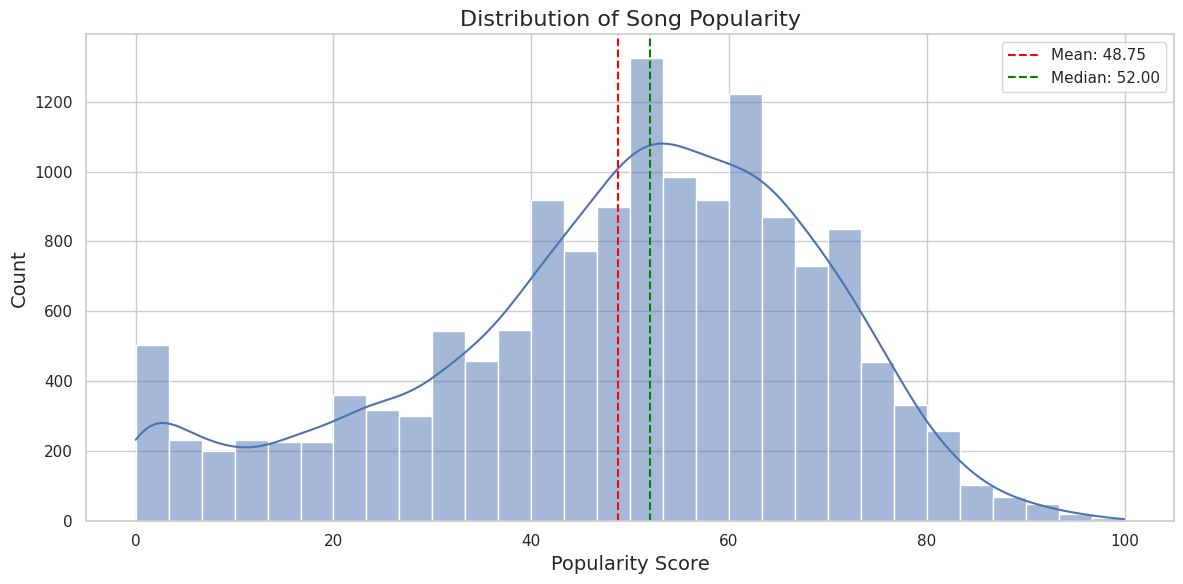

In [15]:
#Distribution of song popularity
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['song_popularity'], kde=True, bins=30)
plt.title('Distribution of Song Popularity', fontsize=16)
plt.xlabel('Popularity Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.axvline(df_cleaned['song_popularity'].mean(), color='red', linestyle='--',
            label=f'Mean: {df_cleaned["song_popularity"].mean():.2f}')
plt.axvline(df_cleaned['song_popularity'].median(), color='green', linestyle='--',
            label=f'Median: {df_cleaned["song_popularity"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

Dari distribusi popularitas lagu, terlihat bahwa data memiliki left-skewed distribution dengan mean (48.75) lebih kecil dari median (52.00), yang dikonfirmasi oleh nilai skewness negatif (-0.56). Distribusi ini menunjukkan pola bimodal dengan dua puncak yang jelas - satu di sekitar skor 10-15 dan puncak utama di sekitar 50-55, mengindikasikan adanya dua kelompok lagu yang berbeda dalam dataset.

distribusi ini sangat cocok untuk classification task karena memiliki natural breakpoints yang jelas, dibandingkan dengan regression yang akan menantang karena data tidak berdistribusi normal.

In [16]:
print("\nPopularity Statistics:")
print(f"Mean Popularity: {df_cleaned['song_popularity'].mean():.2f}")
print(f"Median Popularity: {df_cleaned['song_popularity'].median():.2f}")
print(f"Standard Deviation: {df_cleaned['song_popularity'].std():.2f}")
print(f"Skewness: {df_cleaned['song_popularity'].skew():.2f}")
print(f"Kurtosis: {df_cleaned['song_popularity'].kurtosis():.2f}")


Popularity Statistics:
Mean Popularity: 48.75
Median Popularity: 52.00
Standard Deviation: 20.38
Skewness: -0.56
Kurtosis: -0.18


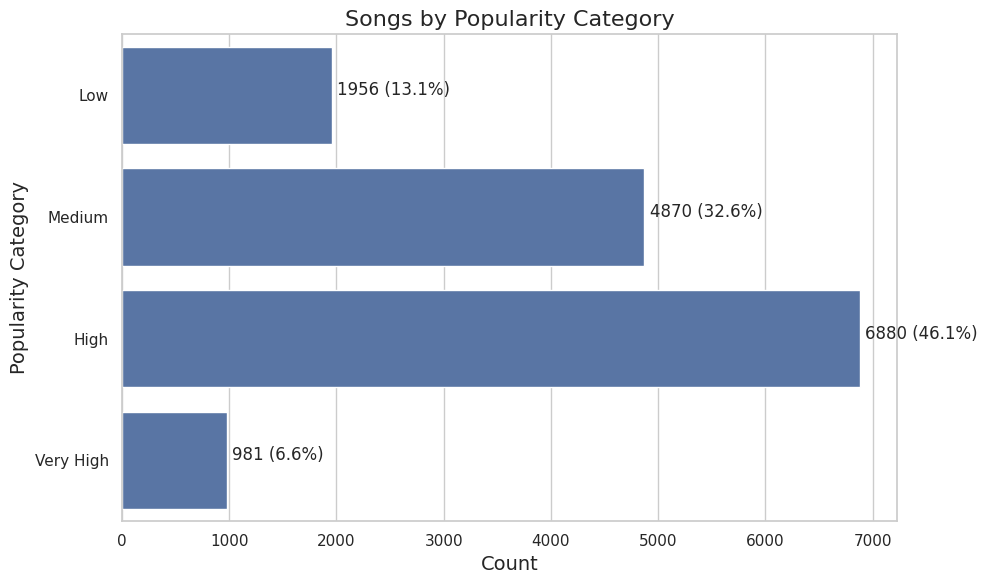

In [17]:
# Create popularity categories for analysis
df_cleaned['popularity_category'] = pd.cut(df_cleaned['song_popularity'],
                                  bins=[0, 25, 50, 75, 100],
                                  labels=['Low', 'Medium', 'High', 'Very High'])

# Plot the categorical distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='popularity_category', data=df_cleaned, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Songs by Popularity Category', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Popularity Category', fontsize=14)
for i, count in enumerate(df_cleaned['popularity_category'].value_counts(sort=False)):
    plt.text(count + 50, i, f'{count} ({count/len(df_cleaned):.1%})')
plt.tight_layout()
plt.show()

Setelah mengkategorikan popularitas lagu ke dalam empat tier (0-25, 25-50, 50-75, 75-100), terlihat bahwa distribusi data menunjukkan severe class imbalance yang cukup menarik. Kategori High popularity (50-75) mendominasi dataset dengan 6,880 lagu (46.1%), diikuti oleh Medium popularity (25-50) dengan 4,870 lagu (32.6%). Ini mengkonfirmasi bahwa sebagian besar lagu dalam dataset berada di rentang popularitas menengah hingga tinggi, bukan di ekstrem rendah atau sangat tinggi.

Dari perspektif machine learning, class imbalance ini akan menjadi tantangan utama dalam modeling. Algorithm akan cenderung bias terhadap kelas mayoritas (High dan Medium), sehingga diperlukan strategi seperti stratified sampling, class weighting, atau SMOTE untuk mengatasi imbalance ini. Alternatively, kita bisa mempertimbangkan untuk merge categories menjadi binary classification (Popular vs Non-Popular) atau three-tier classification untuk mendapatkan distribusi yang lebih balanced dan performa model yang lebih robust.

## Numerical Feature

In [18]:
# Select numerical columns (excluding target and categorical)
numerical_cols = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
                 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                 'tempo', 'audio_valence']

# Descriptive statistics
print("\nDescriptive Statistics for Numerical Features:")
print(df_cleaned[numerical_cols].describe().round(3))


Descriptive Statistics for Numerical Features:
       song_duration_ms  acousticness  danceability     energy  \
count         14926.000     14926.000     14926.000  14926.000   
mean         218949.581         0.270         0.625      0.640   
std           62340.803         0.298         0.158      0.222   
min           12000.000         0.000         0.000      0.001   
25%          183943.500         0.024         0.524      0.496   
50%          211845.500         0.139         0.636      0.672   
75%          244720.000         0.458         0.740      0.818   
max         1799346.000         0.996         0.987      0.999   

       instrumentalness   liveness   loudness  speechiness      tempo  \
count         14926.000  14926.000  14926.000    14926.000  14926.000   
mean              0.092      0.180     -7.677        0.099    121.105   
std               0.240      0.145      4.019        0.104     29.045   
min               0.000      0.011    -38.768        0.000      0

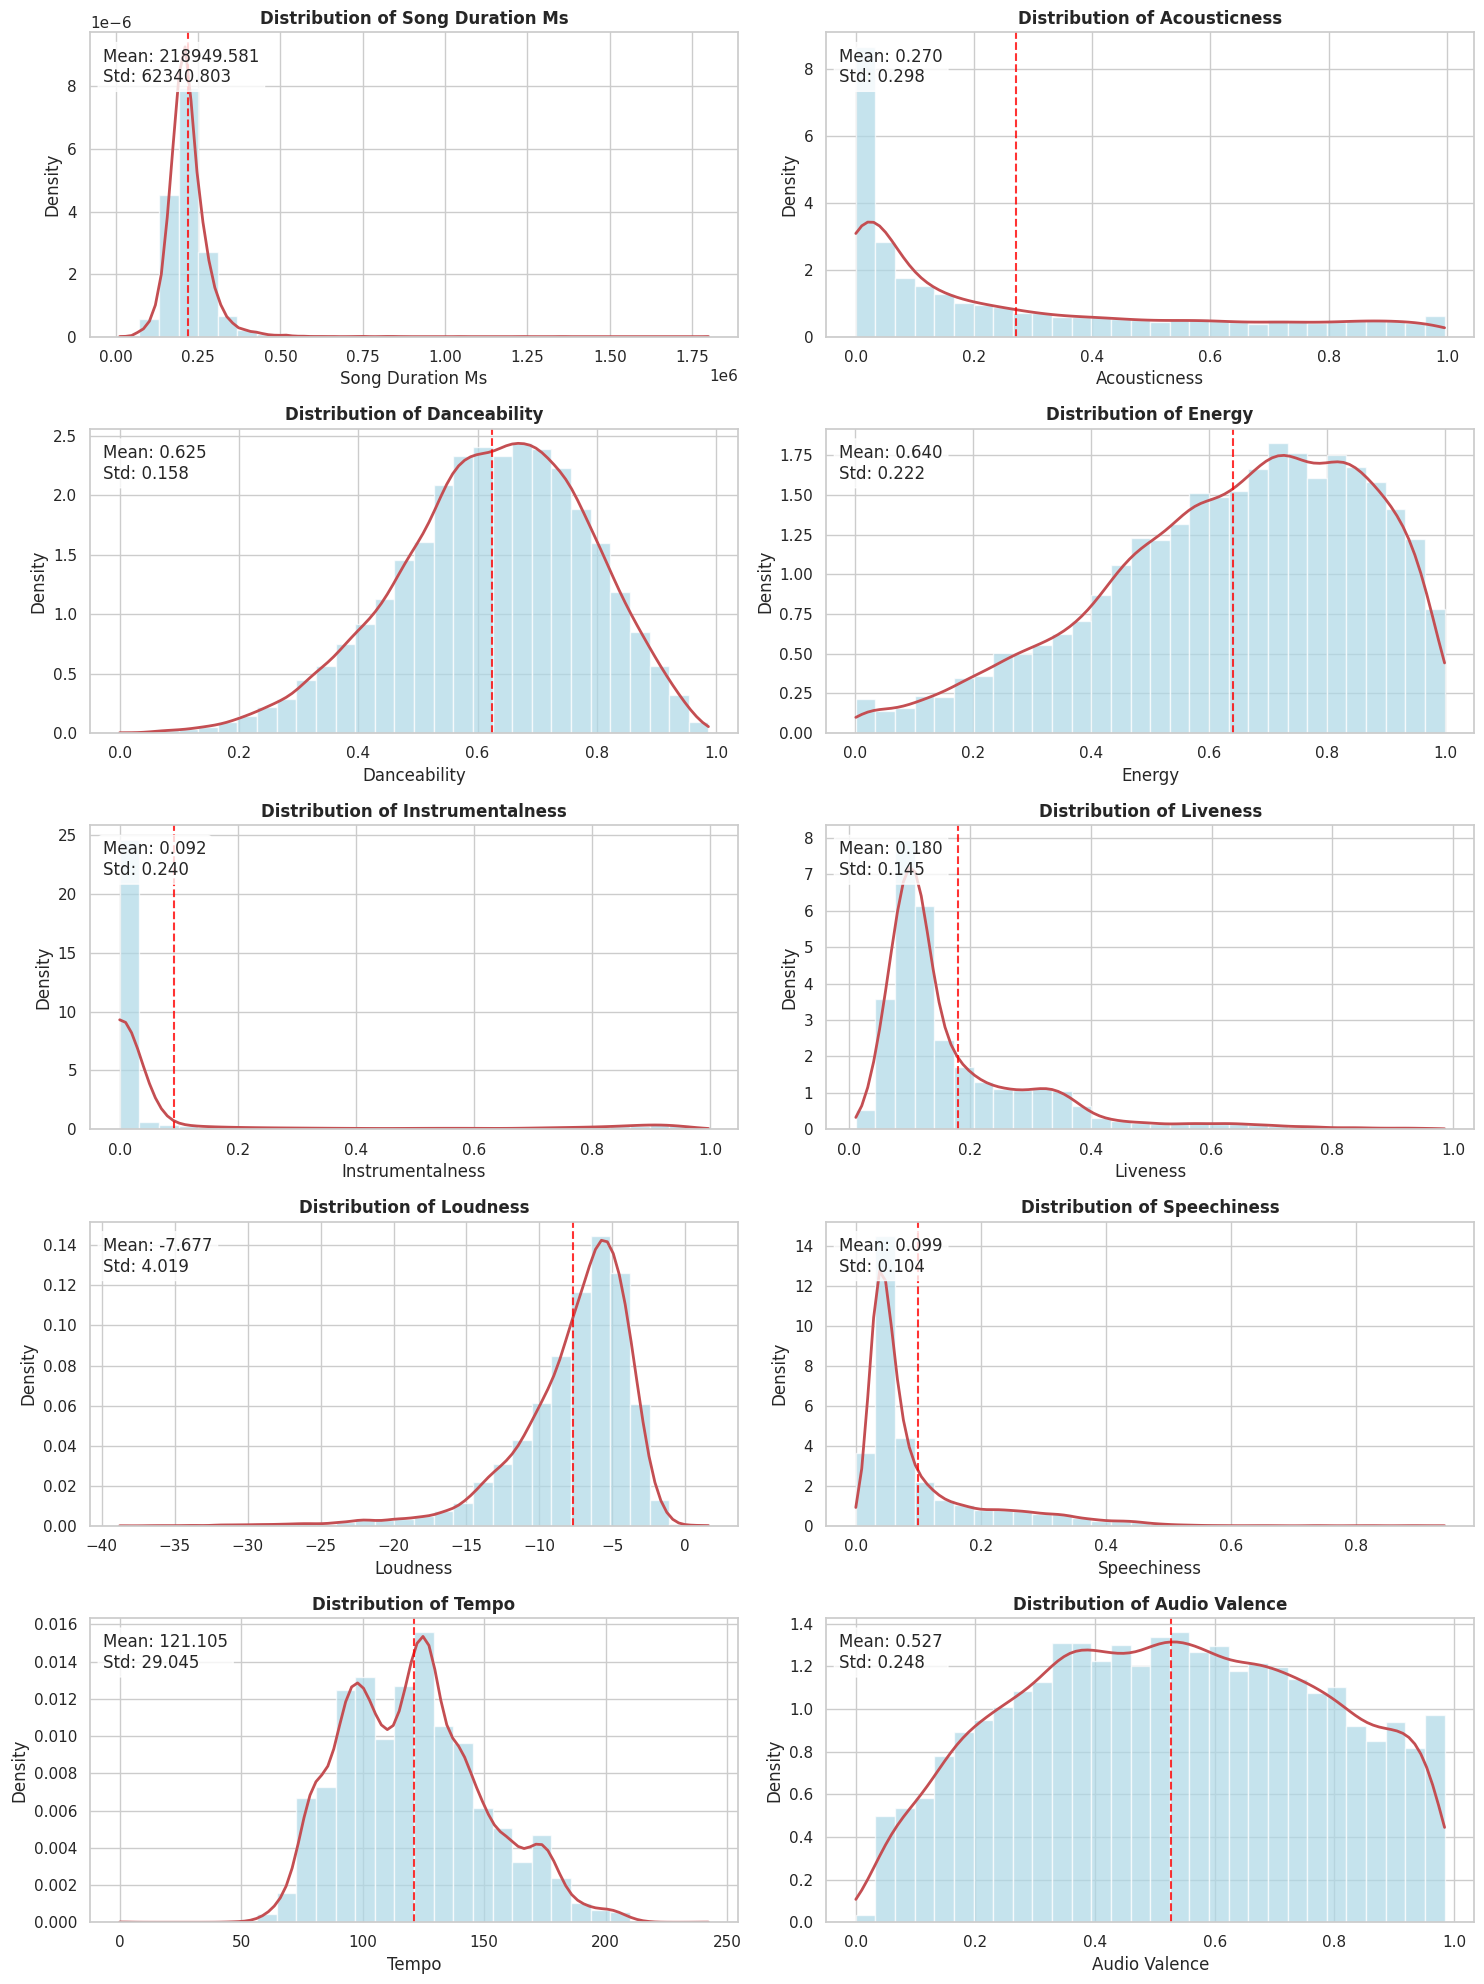

In [19]:
# Distribution plots for all numerical features
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Histogram with KDE
    axes[i].hist(df_cleaned[col], bins=30, alpha=0.7, density=True, color='lightblue')

    # Add KDE curve
    data = df_cleaned[col].dropna()
    kde_x = np.linspace(data.min(), data.max(), 100)
    kde = stats.gaussian_kde(data)
    axes[i].plot(kde_x, kde(kde_x), 'r-', linewidth=2)

    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Density')

    # Add statistics text
    mean_val = data.mean()
    std_val = data.std()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8)
    axes[i].text(0.02, 0.95, f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}',
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Dari visualisasi distribusi 10 fitur numerik, terlihat beberapa pola yang menarik dan mengkhawatirkan. Song Duration menunjukkan distribusi normal yang baik dengan mean sekitar 218 detik (3.6 menit), yang masuk akal untuk durasi lagu pop pada umumnya. Danceability, Energy, dan Audio Valence menunjukkan distribusi yang relatif seimbang dan spread yang baik across their ranges, menunjukkan variasi yang cukup dalam dataset untuk fitur-fitur kunci ini.

Namun, beberapa fitur menunjukkan red flags yang serius. Acousticness sangat right-skewed dengan mayoritas lagu memiliki nilai rendah (mean 0.270), Instrumentalness bahkan lebih ekstrem dengan severe right skew (mean 0.092) dimana hampir semua lagu adalah vocal-based, dan Speechiness juga menunjukkan pola serupa (mean 0.099) dengan mayoritas lagu bukan speech-based. Liveness juga sangat skewed dengan mean hanya 0.180, menunjukkan sebagian besar rekaman adalah studio recordings.

In [20]:
# Multiple outlier detection methods
outlier_methods = ['IQR', 'Z-Score', 'Modified Z-Score', 'Isolation Forest']
outlier_summary = pd.DataFrame(index=numerical_cols, columns=outlier_methods)

from sklearn.ensemble import IsolationForest

for col in numerical_cols:
    data = df_cleaned[col].dropna().values.reshape(-1, 1)

    # IQR Method
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    iqr_outliers = np.sum((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

    # Z-Score Method (|z| > 3)
    z_scores = np.abs(stats.zscore(data.flatten()))
    z_outliers = np.sum(z_scores > 3)

    # Modified Z-Score Method
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data.flatten() - median) / mad if mad != 0 else np.zeros_like(data.flatten())
    mod_z_outliers = np.sum(np.abs(modified_z_scores) > 3.5)

    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outlier_pred = iso_forest.fit_predict(data)
    iso_outliers = np.sum(outlier_pred == -1)

    outlier_summary.loc[col] = [iqr_outliers, z_outliers, mod_z_outliers, iso_outliers]

print("Outlier Detection Results (Number of outliers by method):")
print(outlier_summary)

Outlier Detection Results (Number of outliers by method):
                   IQR Z-Score Modified Z-Score Isolation Forest
song_duration_ms   643     186              333             1493
acousticness         0       0             1190             1492
danceability       111      51                9             1492
energy              45       0                0             1475
instrumentalness  3212     805             6149             1492
liveness           935     407             1749             1487
loudness           564     276              416             1490
speechiness       1821     317             2601             1490
tempo               68      18                3             1490
audio_valence        0       0                0             1481


Instrumentalness dan Speechiness menunjukkan massive outliers di semua metode, terutama IQR (3212 & 1821 outliers). Ini mengkonfirmasi extreme right-skewed distribution yang sudah terlihat dari visualisasi sebelumnya. Liveness juga menunjukkan pola serupa dengan banyak outliers di semua metode.

Hasil ini memperkuat rekomendasi untuk menghapus instrumentalness, speechiness, dan liveness karena mereka memiliki excessive outliers yang menunjukkan poor data quality dan extreme skewness.

IQR Method menggunakan konsep interquartile range dimana outlier didefinisikan sebagai data yang berada di luar rentang Q1-1.5×IQR hingga Q3+1.5×IQR. Metode ini robust terhadap distribusi non-normal karena tidak mengasumsikan normalitas data, namun cenderung terlalu sensitif dan bisa menganggap terlalu banyak data sebagai outlier, terutama pada distribusi yang skewed.

Z-Score Method mengukur seberapa jauh suatu data point dari mean dalam satuan standard deviation, dimana data dianggap outlier jika nilai absolut z-score lebih dari 3. Metode ini simple dan mudah diinterpretasi, namun memiliki kelemahan fatal yaitu mengasumsikan data berdistribusi normal dan sangat sensitif terhadap extreme values, sehingga kurang reliable untuk data musik yang umumnya non-normal.

Modified Z-Score merupakan versi robust dari Z-Score yang menggunakan median dan MAD (Median Absolute Deviation) sebagai pengganti mean dan standard deviation. Metode ini lebih resistant terhadap outliers dan tidak mengasumsikan normalitas, dengan threshold yang lebih tinggi (3.5) untuk mengkompensasi penggunaan median. Metode ini generally lebih balanced dalam mendeteksi outliers pada data non-normal.

Isolation Forest adalah metode machine learning yang mengisolasi anomalies berdasarkan path length dalam binary tree structure. Konsepnya adalah outliers lebih mudah diisolasi karena membutuhkan fewer splits dalam tree. Metode ini dapat mendeteksi complex patterns dan tidak mengasumsikan distribusi tertentu, namun bersifat black box dan memerlukan parameter contamination yang harus diset manual.

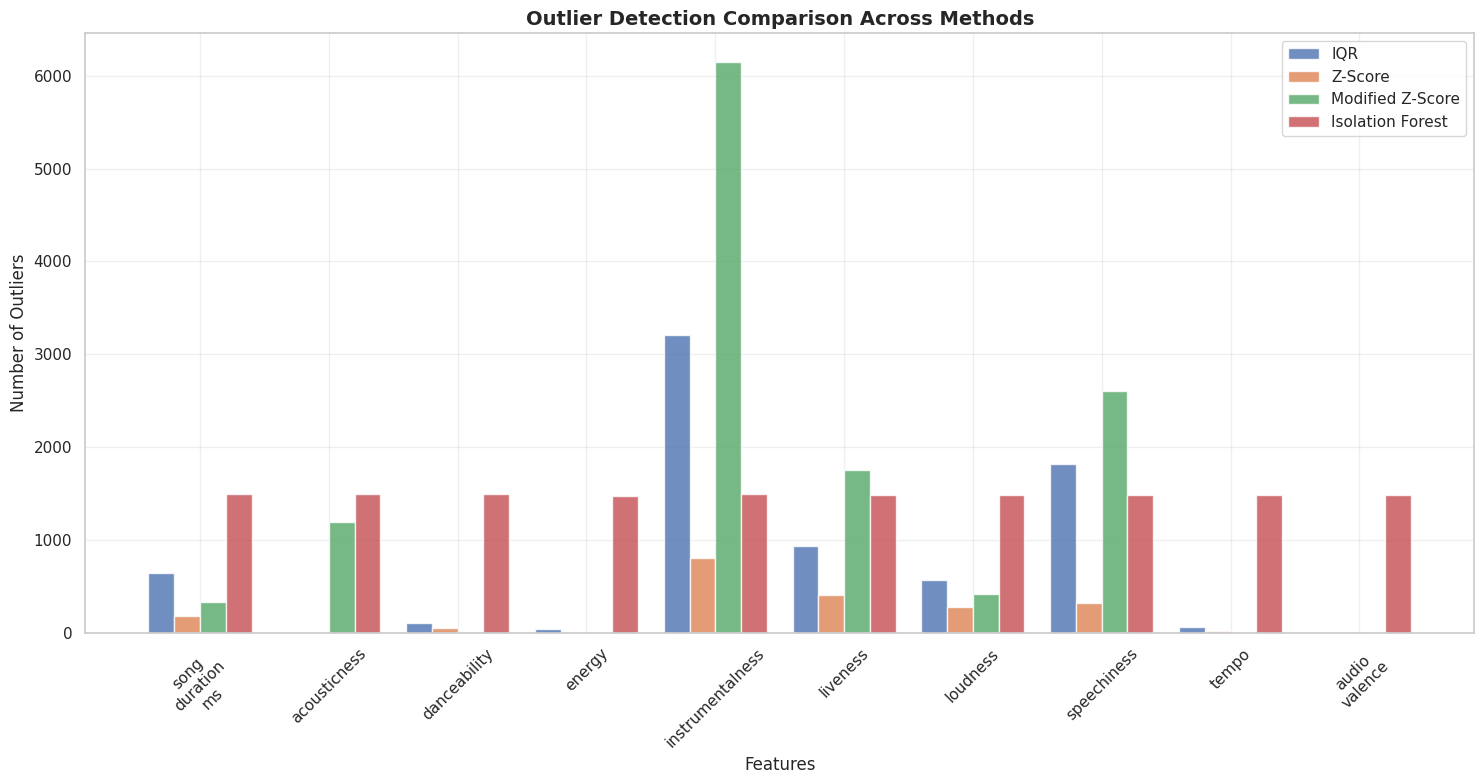

In [21]:
# Visualize outlier comparison
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(numerical_cols))
width = 0.2

for i, method in enumerate(outlier_methods):
    values = outlier_summary[method].astype(int)
    ax.bar(x + i*width, values, width, label=method, alpha=0.8)

ax.set_xlabel('Features')
ax.set_ylabel('Number of Outliers')
ax.set_title('Outlier Detection Comparison Across Methods', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([col.replace('_', '\n') for col in numerical_cols], rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Categorical

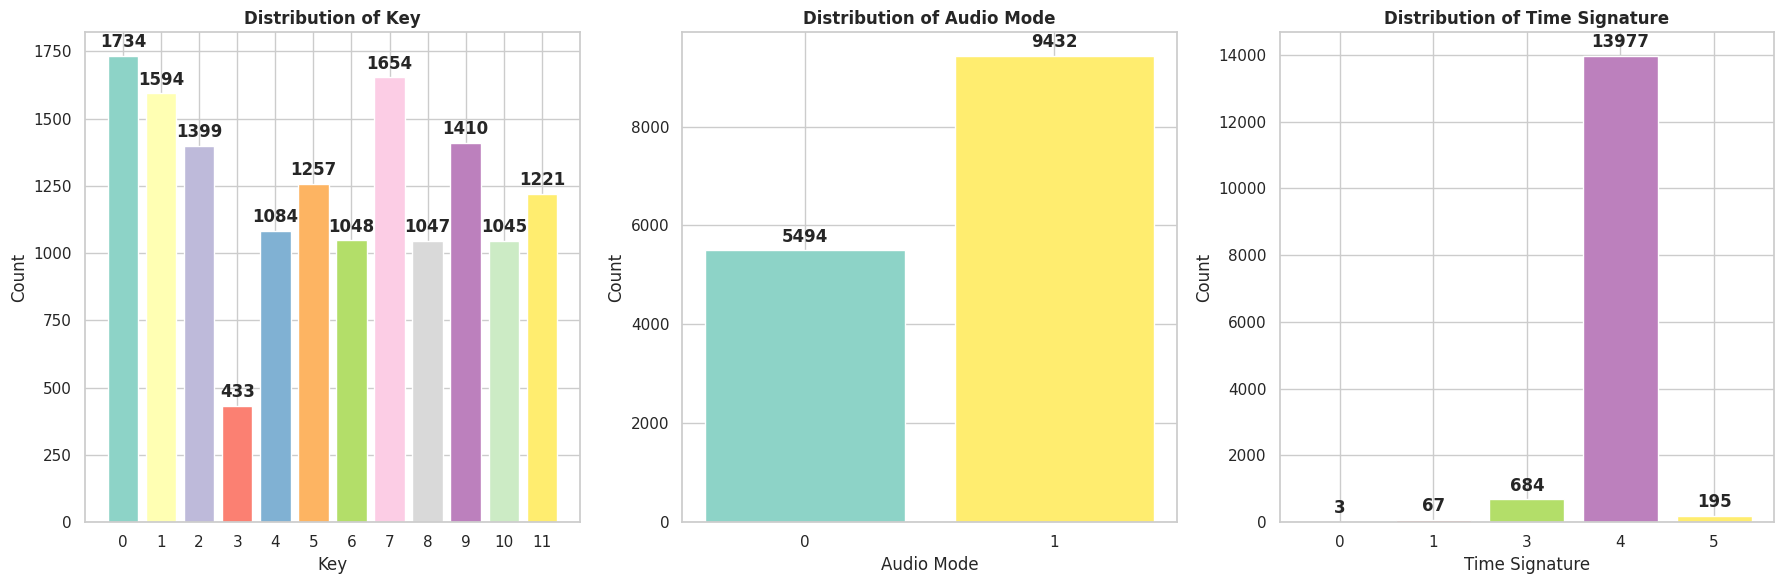

In [23]:
categorical_cols = ['key', 'audio_mode', 'time_signature']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(categorical_cols):
    value_counts = df_cleaned[col].value_counts().sort_index()

    axes[i].bar(range(len(value_counts)), value_counts.values,
                color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index)

    # Add count labels
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + max(value_counts.values)*0.01, str(v),
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Dari distribusi ketiga fitur kategorikal, terlihat pola yang sangat berbeda dalam hal variasi dan balance. Key menunjukkan distribusi yang relatif merata across 12 musical keys (0-11), dengan rentang count dari sekitar 433 hingga 1734, menunjukkan reasonable variation meski ada beberapa keys yang lebih populer seperti key 1 dan key 0.

Audio Mode menunjukkan severe class imbalance yang mengkhawatirkan dengan mode 1 (major) mendominasi secara ekstrem dengan 9432 lagu, sementara mode 0 (minor) hanya 5494 lagu.

Time Signature menunjukkan extreme imbalance yang sangat problematic dengan time signature 4 (4/4 time) mendominasi secara overwhelming dengan 13,977 lagu (sekitar 93.5% dari total dataset).

Time Signature sangat disarankan untuk DIHAPUS karena extreme class imbalance (93.5% dalam satu category) yang membuat fitur ini non-informative untuk modeling. Machine learning algorithms akan struggle untuk learn meaningful patterns dari fitur dengan such severe imbalance, dan fitur ini essentially becomes a constant for mayoritas data. Audio Mode sebaiknya DIPERTAHANKAN meski imbalanced karena masih memiliki reasonable representation untuk kedua categories dan major vs minor distinction is musically meaningful. Key juga DIPERTAHANKAN karena menunjukkan good distribution across all categories dan musical key adalah important feature yang bisa mempengaruhi song popularity dan listener preference.






In [24]:
# Categorical features statistics
print("\nCategorical Features Summary:")
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    value_counts = df_cleaned[col].value_counts()
    for val, count in value_counts.items():
        print(f"  {val}: {count} ({count/len(df_cleaned)*100:.1f}%)")


Categorical Features Summary:

KEY:
  0: 1734 (11.6%)
  7: 1654 (11.1%)
  1: 1594 (10.7%)
  9: 1410 (9.4%)
  2: 1399 (9.4%)
  5: 1257 (8.4%)
  11: 1221 (8.2%)
  4: 1084 (7.3%)
  6: 1048 (7.0%)
  8: 1047 (7.0%)
  10: 1045 (7.0%)
  3: 433 (2.9%)

AUDIO_MODE:
  1: 9432 (63.2%)
  0: 5494 (36.8%)

TIME_SIGNATURE:
  4: 13977 (93.6%)
  3: 684 (4.6%)
  5: 195 (1.3%)
  1: 67 (0.4%)
  0: 3 (0.0%)


## Corellarion Analysis

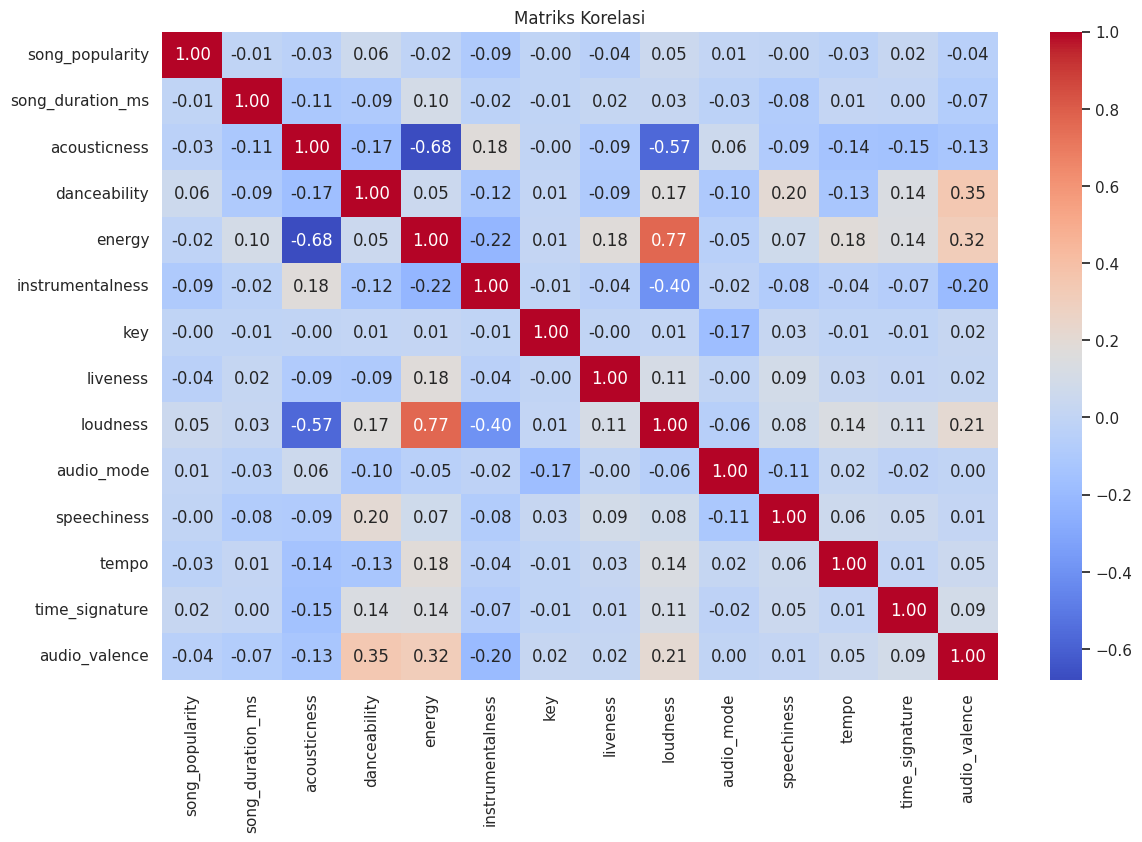

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

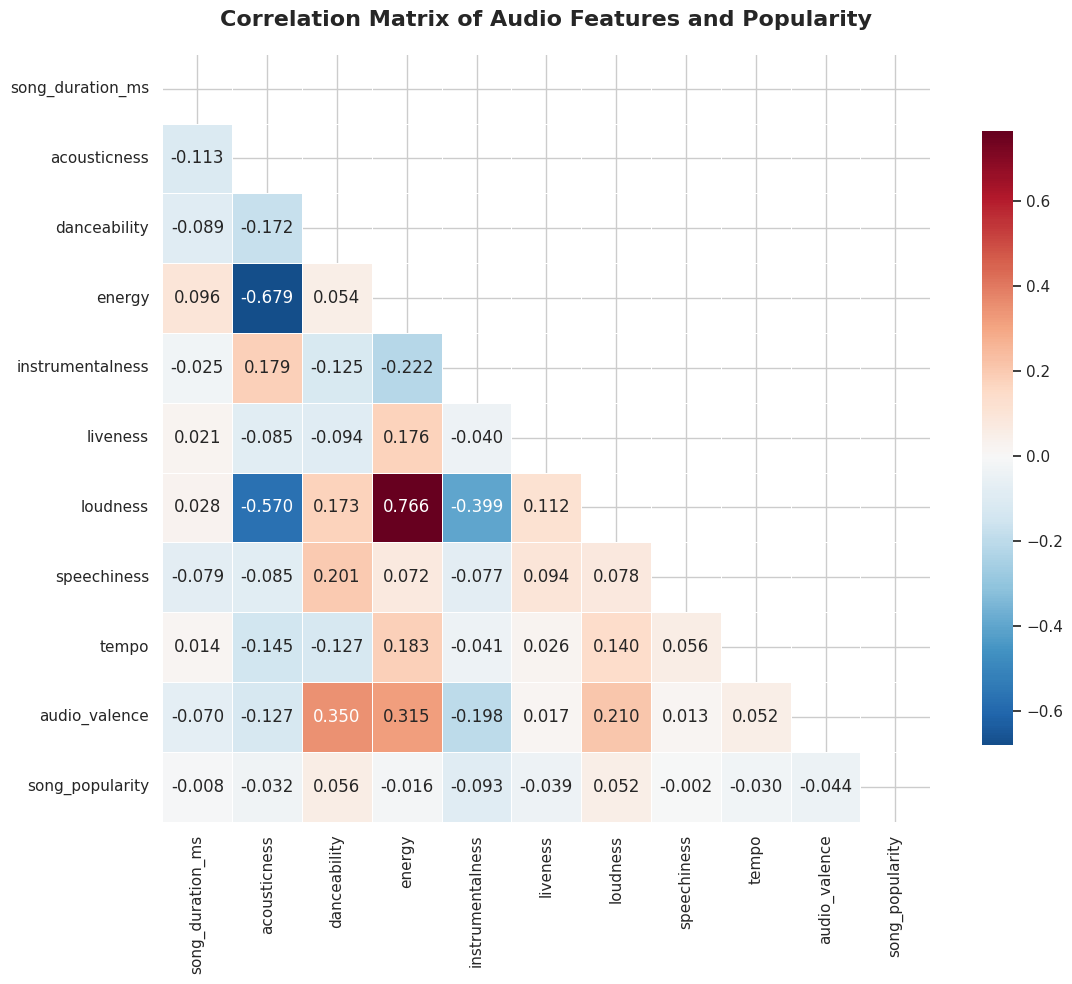

In [26]:
# Calculate correlation matrix
correlation_cols = numerical_cols + ['song_popularity']
corr_matrix = df_cleaned[correlation_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Correlation Matrix of Audio Features and Popularity',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Song Popularity Correlations menunjukkan hasil yang sangat mengecewakan dan concerning untuk modeling purposes. Semua audio features memiliki extremely weak correlations dengan song popularity, dengan nilai korelasi berkisar antara -0.093 hingga 0.056. Yang paling mengkhawatirkan adalah instrumentalness menunjukkan korelasi negatif terkuat (-0.093), yang konsisten dengan temuan sebelumnya bahwa lagu-lagu instrumental cenderung kurang populer dalam dataset ini. Danceability juga menunjukkan korelasi positif yang sangat lemah (0.056), yang sebenarnya counterintuitive karena lagu yang danceable biasanya lebih populer di mainstream music.

Dataset ini jauh lebih cocok untuk klasifikasi daripada regresi karena beberapa alasan kunci:
Weak Correlations dengan popularity (maksimal hanya 0.056) menunjukkan bahwa predicting exact popularity scores akan sangat inaccurate. Linear relationships hampir tidak ada, sehingga regression models akan struggle untuk predict continuous values dengan baik.

Classification lebih practical untuk music industry - lebih berguna mengetahui "hit vs flop" atau "low/medium/high popularity" daripada exact scores. Business decisions lebih actionable dengan categorical predictions daripada noisy numerical predictions.

Non-linear patterns dan threshold effects kemungkinan ada dalam data (misalnya kombinasi energy + danceability untuk hits), yang lebih mudah di-capture oleh classification algorithms dibanding regression pada continuous scale.

In [29]:
# Strongest correlations with popularity
print("\nStrongest Correlations with Song Popularity:")
popularity_corr = corr_matrix['song_popularity'].abs().sort_values(ascending=False)[1:]
for feature, corr_value in popularity_corr.head(5).items():
    direction = "positive" if corr_matrix.loc[feature, 'song_popularity'] > 0 else "negative"
    print(f"{feature}: {corr_value:.3f} ({direction})")


Strongest Correlations with Song Popularity:
instrumentalness: 0.093 (negative)
danceability: 0.056 (positive)
loudness: 0.052 (positive)
audio_valence: 0.044 (negative)
liveness: 0.039 (negative)


In [30]:
# Feature correlation pairs (excluding popularity)
print("\nStrongest Feature Correlations (excluding popularity):")
corr_pairs = []
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr_val = corr_matrix.iloc[i, j]
        corr_pairs.append((numerical_cols[i], numerical_cols[j], abs(corr_val)))

corr_pairs.sort(key=lambda x: x[2], reverse=True)
for feat1, feat2, corr_val in corr_pairs[:5]:
    direction = "positive" if corr_matrix.loc[feat1, feat2] > 0 else "negative"
    print(f"{feat1} ↔ {feat2}: {corr_val:.3f} ({direction})")



Strongest Feature Correlations (excluding popularity):
energy ↔ loudness: 0.766 (positive)
acousticness ↔ energy: 0.679 (negative)
acousticness ↔ loudness: 0.570 (negative)
instrumentalness ↔ loudness: 0.399 (negative)
danceability ↔ audio_valence: 0.350 (positive)


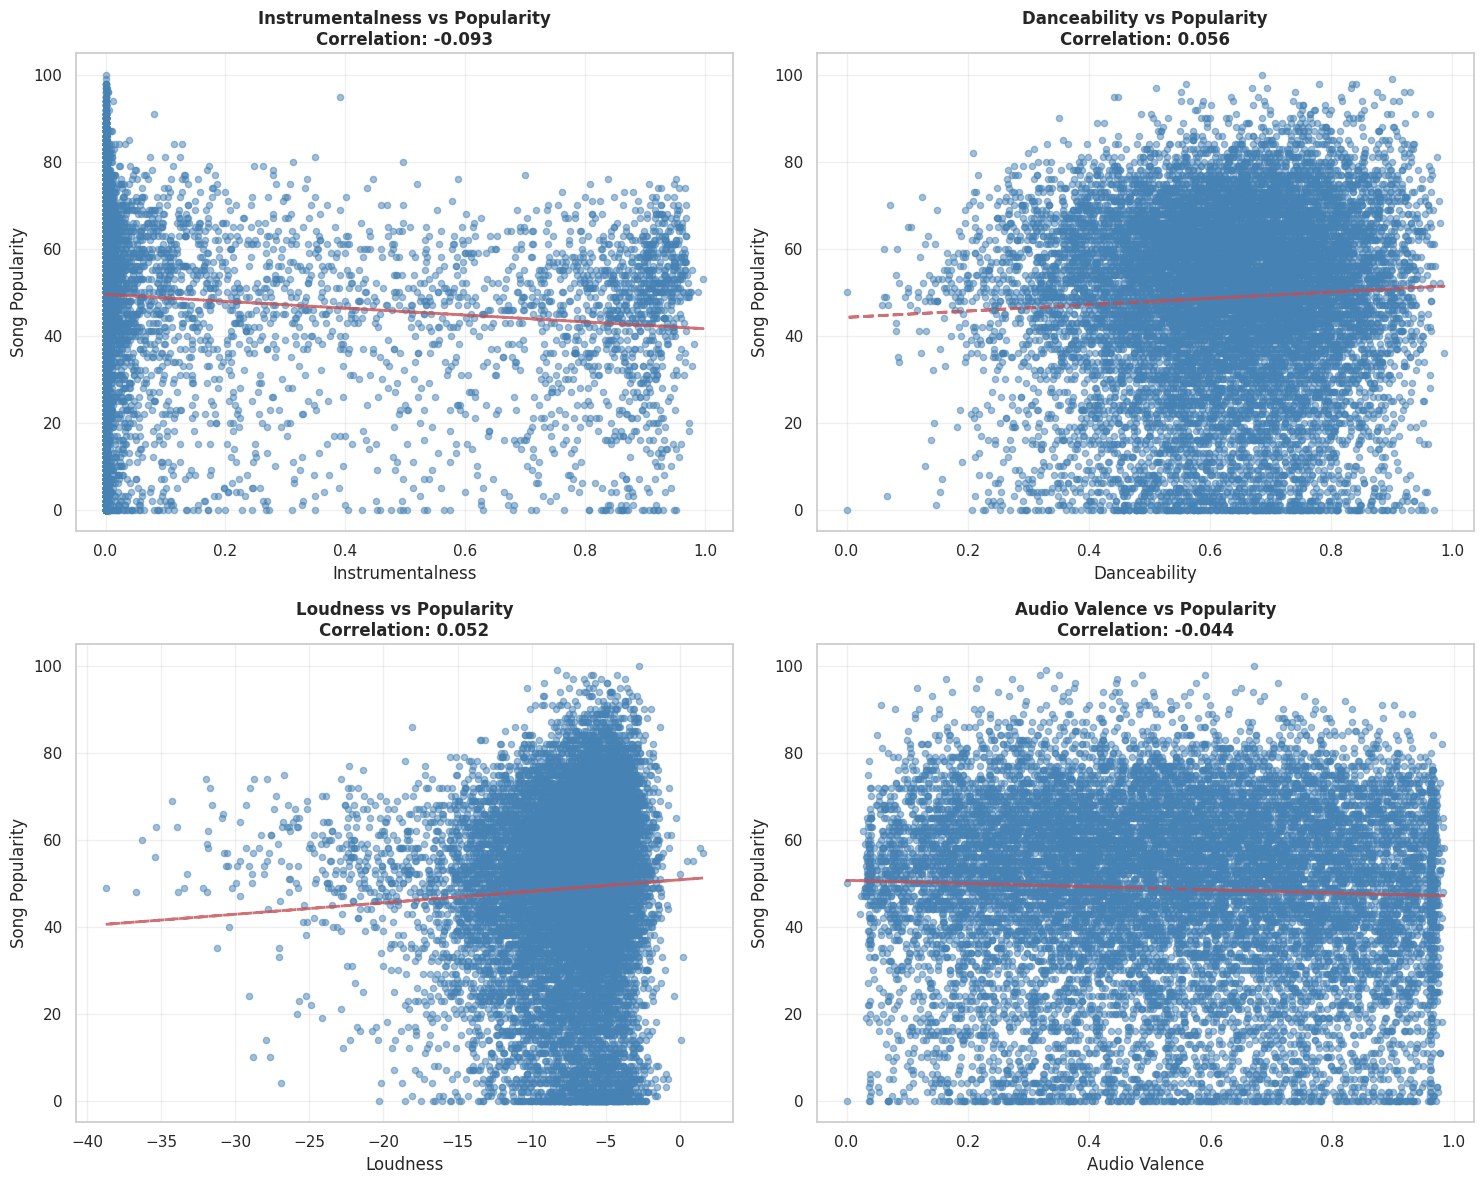

In [31]:
# Select top correlated features for detailed analysis
top_features = popularity_corr.head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    # Scatter plot with trend line
    axes[i].scatter(df_cleaned[feature], df_cleaned['song_popularity'],
                   alpha=0.5, color='steelblue', s=20)

    # Add trend line
    z = np.polyfit(df_cleaned[feature], df_cleaned['song_popularity'], 1)
    p = np.poly1d(z)
    axes[i].plot(df_cleaned[feature], p(df_cleaned[feature]), "r--", alpha=0.8, linewidth=2)

    axes[i].set_xlabel(feature.replace('_', ' ').title())
    axes[i].set_ylabel('Song Popularity')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Popularity\n'
                     f'Correlation: {corr_matrix.loc[feature, "song_popularity"]:.3f}',
                     fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Scatter plots ini strongly confirm bahwa dataset lebih suitable untuk klasifikasi daripada regresi. Extreme scatter dan weak trend lines menunjukkan bahwa linear relationships sangat lemah untuk accurate continuous prediction. Namun, pattern differences yang subtle ini bisa still valuable untuk classification boundaries, terutama untuk identifying extreme cases (very high vs very low popularity) rather than predicting exact popularity scores.

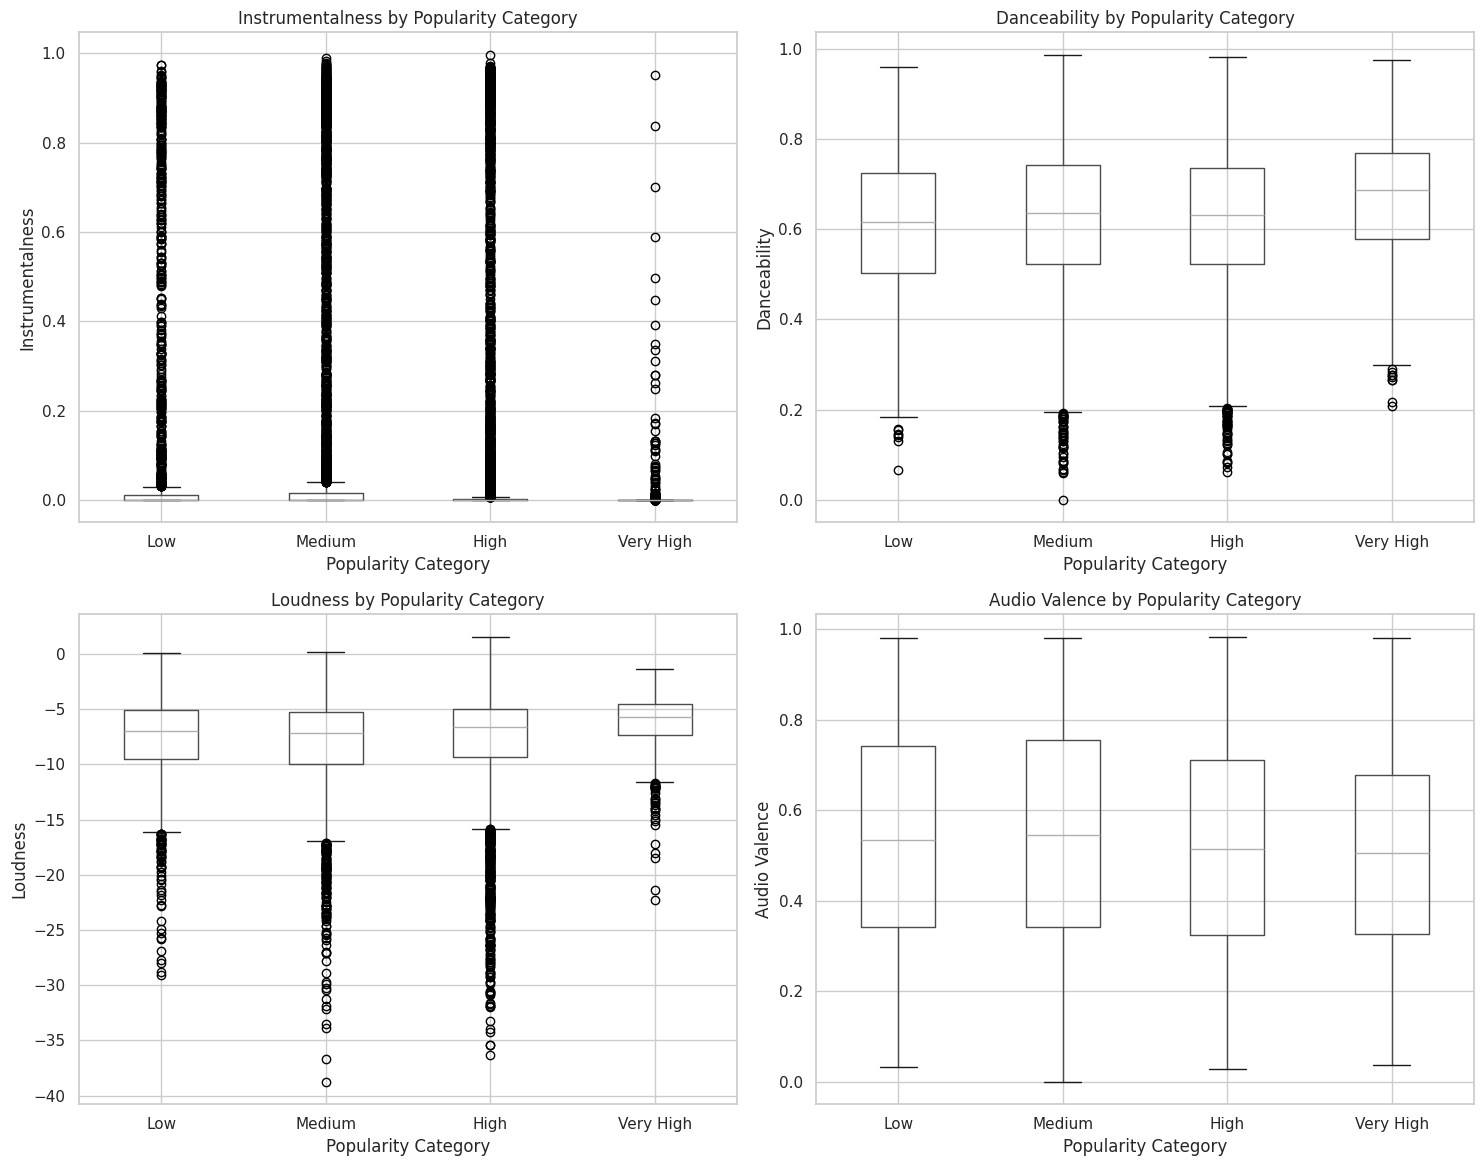

In [32]:
# Box plots by popularity category
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    df_cleaned.boxplot(column=feature, by='popularity_category', ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} by Popularity Category')
    axes[i].set_xlabel('Popularity Category')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()


Boxplots ini memperkuat argumen untuk klasifikasi karena menunjukkan distinguishable patterns antar popularity categories, meski subtle. Very High popularity category khususnya menunjukkan characteristics yang berbeda dari kategori lainnya dalam semua features, yang bisa di-leverage oleh classification algorithms untuk identify potential hits. Patterns ini lebih actionable untuk classification daripada regression karena focus pada categorical differences rather than exact numerical predictions.

## TOP AND WORST SONG CHARACTERISTICS

In [33]:
# Define high and low popularity thresholds
high_pop_threshold = df_cleaned['song_popularity'].quantile(0.8)
low_pop_threshold = df_cleaned['song_popularity'].quantile(0.2)

high_pop_songs = df_cleaned[df_cleaned['song_popularity'] >= high_pop_threshold]
low_pop_songs = df_cleaned[df_cleaned['song_popularity'] <= low_pop_threshold]

print(f"High Popularity Songs (≥{high_pop_threshold:.0f}): {len(high_pop_songs)} songs")
print(f"Low Popularity Songs (≤{low_pop_threshold:.0f}): {len(low_pop_songs)} songs")


High Popularity Songs (≥66): 3140 songs
Low Popularity Songs (≤32): 3010 songs


Dataset berhasil di-segment menjadi clear extreme groups dengan 3,140 high popularity songs (≥66 popularity score) dan 3,010 low popularity songs (≤32 popularity score).

In [34]:
# Compare characteristics
print("\nCHARACTERISTICS COMPARISON:")
print("-" * 50)

comparison_data = []
for feature in numerical_cols:
    high_mean = high_pop_songs[feature].mean()
    low_mean = low_pop_songs[feature].mean()
    difference = high_mean - low_mean

    comparison_data.append({
        'Feature': feature,
        'High_Pop_Mean': high_mean,
        'Low_Pop_Mean': low_mean,
        'Difference': difference,
        'Abs_Difference': abs(difference)
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Abs_Difference', ascending=False)

print("Features with BIGGEST differences between High vs Low popularity songs:")
for _, row in comparison_df.head(5).iterrows():
    direction = "higher" if row['Difference'] > 0 else "lower"
    print(f"{row['Feature']}: High pop songs have {direction} values "
          f"({row['High_Pop_Mean']:.3f} vs {row['Low_Pop_Mean']:.3f}, "
          f"diff: {row['Difference']:+.3f})")


CHARACTERISTICS COMPARISON:
--------------------------------------------------
Features with BIGGEST differences between High vs Low popularity songs:
song_duration_ms: High pop songs have higher values (221038.195 vs 220676.119, diff: +362.077)
tempo: High pop songs have lower values (120.565 vs 122.572, diff: -2.007)
loudness: High pop songs have higher values (-6.879 vs -7.740, diff: +0.861)
instrumentalness: High pop songs have lower values (0.032 vs 0.107, diff: -0.074)
acousticness: High pop songs have lower values (0.225 vs 0.276, diff: -0.051)


Durasi Lagu: Lagu populer sedikit lebih panjang (+362ms ≈ 6 detik), menunjukkan pendengar lebih suka lagu dengan konten yang lebih berkembang, meski perbedaannya minimal.
Tempo: Temuan mengejutkan - lagu hit memiliki tempo lebih lambat (-2 BPM), menunjukkan preferensi terhadap lagu mid-tempo daripada lagu cepat berenergi tinggi. Ini menantang asumsi "energik = populer."
Loudness: Lagu populer lebih keras (+0.86 dB), mengkonfirmasi "loudness war" dalam produksi musik dimana mastering dengan volume tinggi berkorelasi dengan kesuksesan komersial.
Instrumentalness: Pola kuat - lagu populer jauh lebih sedikit instrumental (-0.074), mengkonfirmasi bahwa lagu bervokal mendominasi kesuksesan mainstream.
Acousticness: Lagu populer kurang akustik (-0.051), menunjukkan preferensi terhadap elemen produksi/elektronik daripada rekaman akustik mentah.

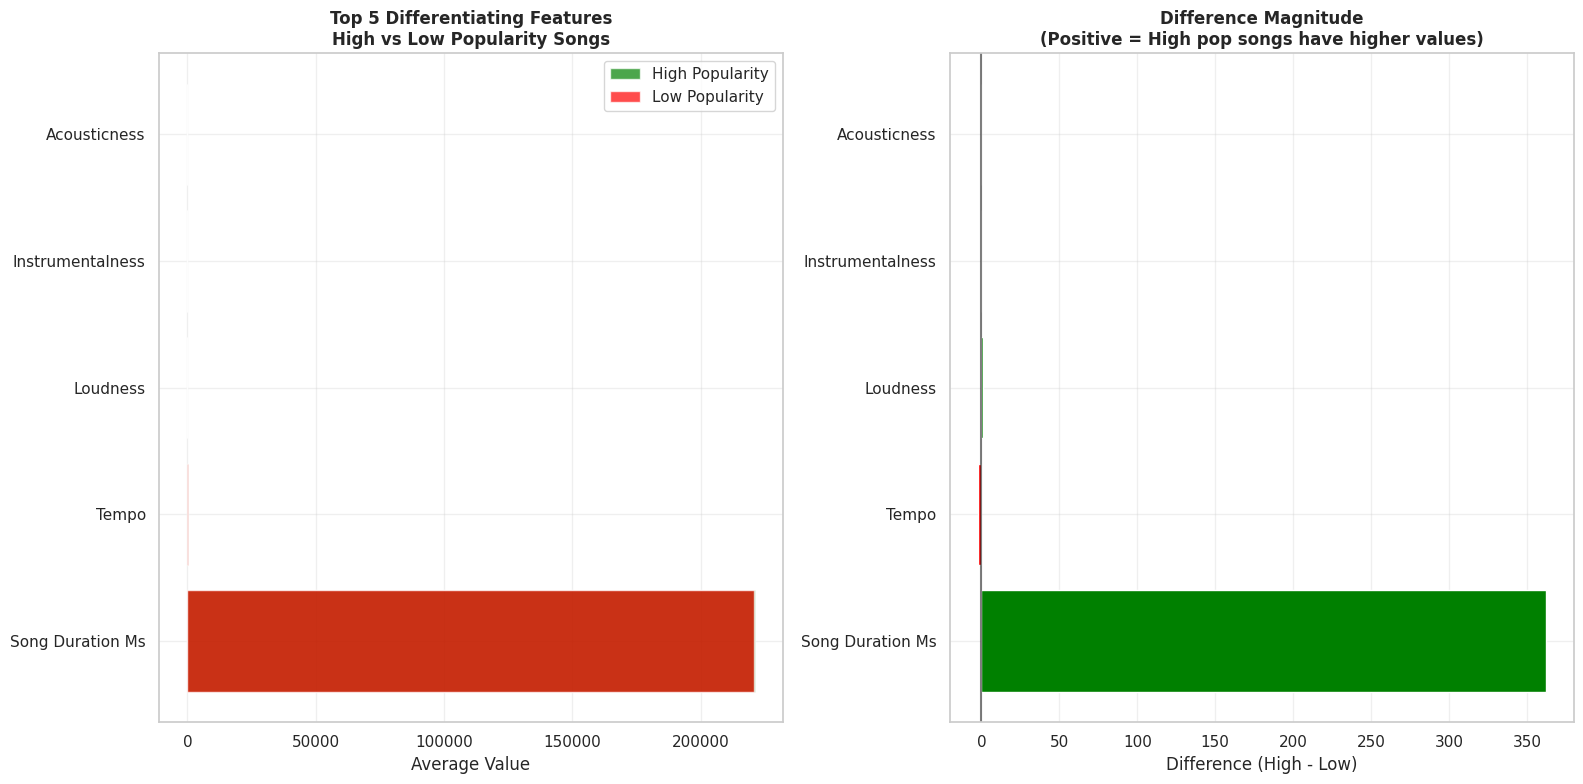

In [35]:
# Visualization of top/worst characteristics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 5 differentiating features
top_features_diff = comparison_df.head(5)
y_pos = np.arange(len(top_features_diff))

ax1.barh(y_pos, top_features_diff['High_Pop_Mean'], alpha=0.7,
         label='High Popularity', color='green')
ax1.barh(y_pos, top_features_diff['Low_Pop_Mean'], alpha=0.7,
         label='Low Popularity', color='red')

ax1.set_yticks(y_pos)
ax1.set_yticklabels([feat.replace('_', ' ').title() for feat in top_features_diff['Feature']])
ax1.set_xlabel('Average Value')
ax1.set_title('Top 5 Differentiating Features\nHigh vs Low Popularity Songs', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Difference magnitude
ax2.barh(y_pos, top_features_diff['Difference'],
         color=['green' if x > 0 else 'red' for x in top_features_diff['Difference']])
ax2.set_yticks(y_pos)
ax2.set_yticklabels([feat.replace('_', ' ').title() for feat in top_features_diff['Feature']])
ax2.set_xlabel('Difference (High - Low)')
ax2.set_title('Difference Magnitude\n(Positive = High pop songs have higher values)', fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
# T-tests for numerical features between high and low popularity
print("T-TEST RESULTS (High vs Low Popularity):")
print("-" * 45)

for feature in numerical_cols:
    high_values = high_pop_songs[feature]
    low_values = low_pop_songs[feature]

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(high_values, low_values)

    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(high_values) - 1) * high_values.var() +
                         (len(low_values) - 1) * low_values.var()) /
                        (len(high_values) + len(low_values) - 2))
    cohens_d = (high_values.mean() - low_values.mean()) / pooled_std

    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""

    print(f"{feature:15s}: t={t_stat:6.3f}, p={p_value:.6f} {significance}, Cohen's d={cohens_d:.3f}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

T-TEST RESULTS (High vs Low Popularity):
---------------------------------------------
song_duration_ms: t= 0.229, p=0.818950 , Cohen's d=0.006
acousticness   : t=-7.070, p=0.000000 ***, Cohen's d=-0.180
danceability   : t= 6.580, p=0.000000 ***, Cohen's d=0.168
energy         : t= 1.058, p=0.290069 , Cohen's d=0.027
instrumentalness: t=-14.263, p=0.000000 ***, Cohen's d=-0.364
liveness       : t=-3.546, p=0.000393 ***, Cohen's d=-0.090
loudness       : t= 9.482, p=0.000000 ***, Cohen's d=0.242
speechiness    : t= 0.233, p=0.816128 , Cohen's d=0.006
tempo          : t=-2.738, p=0.006197 **, Cohen's d=-0.070
audio_valence  : t=-3.977, p=0.000071 ***, Cohen's d=-0.101

Significance levels: *** p<0.001, ** p<0.01, * p<0.05


Instrumentalness menunjukkan perbedaan terbesar (Cohen's d = -0.364) dengan lagu hit jauh lebih sedikit instrumental. Ini efek paling kuat dalam dataset, mengkonfirmasi bahwa vokal adalah elemen krusial untuk popularitas mainstream.

Loudness memiliki efek sedang (Cohen's d = 0.242) dimana lagu populer signifikan lebih keras. Ini memvalidasi pentingnya mastering yang loud dalam industri musik modern untuk mencapai kesuksesan komersial.


Acousticness dan Danceability menunjukkan efek kecil-sedang (Cohen's d = -0.180 dan 0.168) - lagu hit cenderung kurang akustik dan lebih danceable, menunjukkan preferensi terhadap produksi elektronik dan groove yang mengajak bergerak.

Liveness dan Audio Valence memiliki efek kecil tapi signifikan - lagu populer cenderung studio recordings (bukan live) dan sedikit kurang positif secara emosional.

Moderately Signifikan:
Tempo (p < 0.01) menunjukkan lagu hit sedikit lebih lambat, challenging common assumption tentang musik energetic.

Tidak Signifikan:
Song Duration, Energy, dan Speechiness tidak menunjukkan perbedaan signifikan antara lagu hit dan flop.

In [37]:
# Chi-square tests for categorical features
print("\nCHI-SQUARE TESTS (Categorical features vs Popularity category):")
print("-" * 60)

for feature in categorical_cols:
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['popularity_category'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""

    print(f"{feature:15s}: χ²={chi2:6.3f}, p={p_value:.6f} {significance}, df={dof}")



CHI-SQUARE TESTS (Categorical features vs Popularity category):
------------------------------------------------------------
key            : χ²=69.087, p=0.000235 ***, df=33
audio_mode     : χ²=11.273, p=0.010335 *, df=3
time_signature : χ²=14.060, p=0.296889 , df=12


 📋 **Ringkasan Seleksi Fitur: Keep vs Drop**

**FITUR YANG DIPERTAHANKAN:**

**Loudness**: Cohen's d = 0.242, sangat signifikan (p<0.001), **distribusi bagus**, logika bisnis jelas (efek loudness war)

**Acousticness**: Cohen's d = -0.180, sangat signifikan (p<0.001), **variasi wajar**, bermakna untuk membedakan musik akustik vs produksi

**Danceability**: Cohen's d = 0.168, sangat signifikan (p<0.001), **terdistribusi baik**, langsung relevan untuk prediksi popularitas

**Audio Valence**: Cohen's d = -0.101, signifikan (p<0.001), **distribusi seimbang**, mewakili konten emosional

**Song Duration**: **Distribusi normal**, **tidak ada masalah outlier**, meski non-signifikan tapi **kualitas data bersih**

**Key**: **Terdistribusi baik** di semua 12 key, **fitur musikal bermakna**, **tidak ada masalah kualitas data**

**Audio Mode**: **Keseimbangan wajar** (63% vs 37%), **bermakna secara musikal** (mayor vs minor), **cocok untuk klasifikasi**

**FITUR YANG DIBUANG:**

**Instrumentalness**: **Sangat right-skewed** (90%+ mendekati 0), **outlier masif** (3212), **kualitas data buruk** meski Cohen's d tinggi

**Speechiness**: **Sangat skewed**, **non-signifikan** (p=0.816), **variasi terbatas**, **daya diskriminasi buruk**

**Liveness**: **Distribusi right-skewed**, **banyak outlier**, **efek lemah** (Cohen's d = -0.090)

**Time Signature**: **93.5% dalam satu kategori** (4/4 time), **ketidakseimbangan kelas ekstrem**, **tidak informatif**

**Energy**: **Non-signifikan** (p=0.290), **korelasi lemah**, **redundan** dengan loudness (r=0.766)

**Tempo**: **Efek lemah** (Cohen's d = -0.070), **signifikansi praktis minimal**, **distribusi noisy**



# Preprocessing

In [38]:
# Drop features based on our analysis
features_to_drop = ['instrumentalness', 'speechiness', 'liveness',
                   'time_signature', 'energy', 'tempo']

print("Features yang akan dibuang:")
for feature in features_to_drop:
    print(f"- {feature}")

# Create cleaned dataset
df_final = df_cleaned.drop(columns=features_to_drop)

print(f"\nShape sebelum drop: {df_cleaned.shape}")
print(f"Shape setelah drop: {df_final.shape}")
print(f"\nFitur yang tersisa: {list(df_final.columns)}")

Features yang akan dibuang:
- instrumentalness
- speechiness
- liveness
- time_signature
- energy
- tempo

Shape sebelum drop: (14926, 16)
Shape setelah drop: (14926, 10)

Fitur yang tersisa: ['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'key', 'loudness', 'audio_mode', 'audio_valence', 'popularity_category']


In [39]:
# Feature Engineering
# Convert song_duration_ms to minutes for better interpretability
df_cleaned['song_duration_min'] = df_cleaned['song_duration_ms'] / 60000  # Converting from milliseconds to minutes
df_cleaned.drop('song_duration_ms', axis=1, inplace=True)  # Dropping the old column

In [40]:
# Create classification target based on popularity quartiles
df_final['popularity_quartile'] = pd.qcut(df_final['song_popularity'],
                                         q=4,
                                         labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create binary classification (popular vs not popular)
# Using 75th percentile as threshold
popularity_threshold = df_final['song_popularity'].quantile(0.75)
df_final['is_popular'] = (df_final['song_popularity'] >= popularity_threshold).astype(int)

print("Target Variables Summary:")
print("-" * 30)
print("1. Regression Target: song_popularity")
print(f"   Min: {df_final['song_popularity'].min()}")
print(f"   Max: {df_final['song_popularity'].max()}")
print(f"   Mean: {df_final['song_popularity'].mean():.2f}")
print(f"   Std: {df_final['song_popularity'].std():.2f}")

print("\n2. Multi-class Classification: popularity_quartile")
print(df_final['popularity_quartile'].value_counts().sort_index())

print(f"\n3. Binary Classification: is_popular (threshold >= {popularity_threshold:.0f})")
print(df_final['is_popular'].value_counts())
print(f"Class balance: {df_final['is_popular'].mean()*100:.1f}% popular")

Target Variables Summary:
------------------------------
1. Regression Target: song_popularity
   Min: 0
   Max: 100
   Mean: 48.75
   Std: 20.38

2. Multi-class Classification: popularity_quartile
popularity_quartile
Low            3784
Medium-Low     3960
Medium-High    3450
High           3732
Name: count, dtype: int64

3. Binary Classification: is_popular (threshold >= 64)
is_popular
0    11194
1     3732
Name: count, dtype: int64
Class balance: 25.0% popular


In [41]:
# Define feature columns (excluding all target variables)
feature_columns = ['loudness', 'acousticness', 'danceability', 'audio_valence',
                  'song_duration_ms', 'key', 'audio_mode']

# Extract features
X = df_final[feature_columns].copy()

# Extract targets
y_regression = df_final['song_popularity'].copy()
y_multiclass = df_final['popularity_quartile'].copy()
y_binary = df_final['is_popular'].copy()

print("Features Matrix (X):")
print(f"Shape: {X.shape}")
print(f"Columns: {list(X.columns)}")

print("\nTarget Variables:")
print(f"Regression (y_regression): {y_regression.shape}")
print(f"Multi-class (y_multiclass): {y_multiclass.shape}")
print(f"Binary (y_binary): {y_binary.shape}")

# Check for missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")

Features Matrix (X):
Shape: (14926, 7)
Columns: ['loudness', 'acousticness', 'danceability', 'audio_valence', 'song_duration_ms', 'key', 'audio_mode']

Target Variables:
Regression (y_regression): (14926,)
Multi-class (y_multiclass): (14926,)
Binary (y_binary): (14926,)

Missing values in features: 0


In [42]:
from sklearn.preprocessing import LabelEncoder

# Create copy for processing
X_processed = X.copy()

# Encode categorical variables
le_key = LabelEncoder()
le_mode = LabelEncoder()

X_processed['key_encoded'] = le_key.fit_transform(X_processed['key'])
X_processed['audio_mode_encoded'] = le_mode.fit_transform(X_processed['audio_mode'])

# Drop original categorical columns
X_processed = X_processed.drop(['key', 'audio_mode'], axis=1)

print("Encoding Summary:")
print("-" * 20)
print("Key encoding:")
key_mapping = dict(zip(le_key.classes_, le_key.transform(le_key.classes_)))
for original, encoded in key_mapping.items():
    print(f"  {original} -> {encoded}")

print("\nAudio Mode encoding:")
mode_mapping = dict(zip(le_mode.classes_, le_mode.transform(le_mode.classes_)))
for original, encoded in mode_mapping.items():
    print(f"  {original} -> {encoded}")

print(f"\nFinal features shape: {X_processed.shape}")
print(f"Final features: {list(X_processed.columns)}")

Encoding Summary:
--------------------
Key encoding:
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  6 -> 6
  7 -> 7
  8 -> 8
  9 -> 9
  10 -> 10
  11 -> 11

Audio Mode encoding:
  0 -> 0
  1 -> 1

Final features shape: (14926, 7)
Final features: ['loudness', 'acousticness', 'danceability', 'audio_valence', 'song_duration_ms', 'key_encoded', 'audio_mode_encoded']


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def calculate_vif(df):
    """Calculate VIF for all features"""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       for i in range(len(df.columns))]
    return vif_data.sort_values('VIF', ascending=False)

print("VIF ANALYSIS - Multicollinearity Detection")
print("=" * 50)

# Calculate VIF for all features
vif_results = calculate_vif(X_processed)
print("VIF Values for all features:")
print(vif_results)

print(f"\nVIF Interpretation:")
print(f"VIF < 5: Low multicollinearity (acceptable)")
print(f"VIF 5-10: Moderate multicollinearity (caution)")
print(f"VIF > 10: High multicollinearity (problematic)")

# Check for problematic features
high_vif = vif_results[vif_results['VIF'] > 10]
moderate_vif = vif_results[(vif_results['VIF'] >= 5) & (vif_results['VIF'] <= 10)]

if len(high_vif) > 0:
    print(f"\n🚨 HIGH VIF Features (VIF > 10):")
    for _, row in high_vif.iterrows():
        print(f"   {row['Feature']}: {row['VIF']:.2f}")
    print("   Recommendation: Consider dropping these features")

if len(moderate_vif) > 0:
    print(f"\n⚠️ MODERATE VIF Features (5 ≤ VIF ≤ 10):")
    for _, row in moderate_vif.iterrows():
        print(f"   {row['Feature']}: {row['VIF']:.2f}")
    print("   Recommendation: Monitor performance with/without these features")

acceptable_vif = vif_results[vif_results['VIF'] < 5]
print(f"\n✅ ACCEPTABLE VIF Features (VIF < 5):")
for _, row in acceptable_vif.iterrows():
    print(f"   {row['Feature']}: {row['VIF']:.2f}")

VIF ANALYSIS - Multicollinearity Detection
VIF Values for all features:
              Feature        VIF
2        danceability  12.344090
4    song_duration_ms   8.728033
0            loudness   6.458227
3       audio_valence   6.273063
5         key_encoded   3.065363
1        acousticness   2.746515
6  audio_mode_encoded   2.618765

VIF Interpretation:
VIF < 5: Low multicollinearity (acceptable)
VIF 5-10: Moderate multicollinearity (caution)
VIF > 10: High multicollinearity (problematic)

🚨 HIGH VIF Features (VIF > 10):
   danceability: 12.34
   Recommendation: Consider dropping these features

⚠️ MODERATE VIF Features (5 ≤ VIF ≤ 10):
   song_duration_ms: 8.73
   loudness: 6.46
   audio_valence: 6.27
   Recommendation: Monitor performance with/without these features

✅ ACCEPTABLE VIF Features (VIF < 5):
   key_encoded: 3.07
   acousticness: 2.75
   audio_mode_encoded: 2.62


In [44]:
# Based on VIF results, decide whether to drop high VIF features
# This cell will be adjusted based on VIF output

# Initialize final feature set
X_final = X_processed.copy()
dropped_for_vif = []

# Check if we need to drop features based on VIF
high_vif_features = vif_results[vif_results['VIF'] > 10]['Feature'].tolist()

if len(high_vif_features) > 0:
    print(f"Dropping features with VIF > 10: {high_vif_features}")
    X_final = X_final.drop(columns=high_vif_features)
    dropped_for_vif = high_vif_features

    # Recalculate VIF after dropping features
    print("\nRecalculating VIF after dropping high VIF features:")
    vif_final = calculate_vif(X_final)
    print(vif_final)

else:
    print("No features with VIF > 10. Proceeding with all features.")
    vif_final = vif_results

print(f"\nFinal feature set after VIF analysis:")
print(f"Shape: {X_final.shape}")
print(f"Features: {list(X_final.columns)}")

if dropped_for_vif:
    print(f"Features dropped due to high VIF: {dropped_for_vif}")

Dropping features with VIF > 10: ['danceability']

Recalculating VIF after dropping high VIF features:
              Feature       VIF
3    song_duration_ms  7.022588
0            loudness  6.202631
2       audio_valence  4.290097
4         key_encoded  2.966280
1        acousticness  2.737682
5  audio_mode_encoded  2.596312

Final feature set after VIF analysis:
Shape: (14926, 6)
Features: ['loudness', 'acousticness', 'audio_valence', 'song_duration_ms', 'key_encoded', 'audio_mode_encoded']
Features dropped due to high VIF: ['danceability']


In [45]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Initialize scalers
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

# Apply Standard Scaling (for regression)
X_standard = scaler_standard.fit_transform(X_final)
X_standard = pd.DataFrame(X_standard, columns=X_final.columns, index=X_final.index)

# Apply Robust Scaling (alternative, better for outliers)
X_robust = scaler_robust.fit_transform(X_final)
X_robust = pd.DataFrame(X_robust, columns=X_final.columns, index=X_final.index)

print("Scaling Summary:")
print("-" * 15)
print("Original features statistics:")
print(X_final.describe().round(3))

print("\nStandard Scaled features statistics:")
print(X_standard.describe().round(3))

print("\nRobust Scaled features statistics:")
print(X_robust.describe().round(3))

Scaling Summary:
---------------
Original features statistics:
        loudness  acousticness  audio_valence  song_duration_ms  key_encoded  \
count  14926.000     14926.000      14926.000         14926.000    14926.000   
mean      -7.677         0.270          0.527        218949.581        5.301   
std        4.019         0.298          0.248         62340.803        3.593   
min      -38.768         0.000          0.000         12000.000        0.000   
25%       -9.390         0.024          0.332        183943.500        2.000   
50%       -6.751         0.139          0.527        211845.500        5.000   
75%       -4.991         0.458          0.728        244720.000        8.000   
max        1.585         0.996          0.984       1799346.000       11.000   

       audio_mode_encoded  
count           14926.000  
mean                0.632  
std                 0.482  
min                 0.000  
25%                 0.000  
50%                 1.000  
75%                 

In [46]:
from sklearn.model_selection import train_test_split

# Set random state for reproducibility
RANDOM_STATE = 42
TEST_SIZE = 0.2

print("Splitting data for all model types...")
print("=" * 40)

# 1. Regression Model Split (using standard scaled features)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_standard, y_regression,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=pd.qcut(y_regression, q=4, duplicates='drop')  # Stratify by quartiles
)

# 2. Multi-class Classification Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_standard, y_multiclass,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_multiclass  # Stratify by classes
)

# 3. Binary Classification Split
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_standard, y_binary,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_binary  # Stratify by binary classes
)

print("REGRESSION MODEL:")
print(f"  Training set: {X_train_reg.shape[0]} samples")
print(f"  Test set: {X_test_reg.shape[0]} samples")
print(f"  Target range: {y_train_reg.min():.1f} - {y_train_reg.max():.1f}")

print("\nMULTI-CLASS CLASSIFICATION:")
print(f"  Training set: {X_train_multi.shape[0]} samples")
print(f"  Test set: {X_test_multi.shape[0]} samples")
print("  Training class distribution:")
print(y_train_multi.value_counts().sort_index())

print("\nBINARY CLASSIFICATION:")
print(f"  Training set: {X_train_binary.shape[0]} samples")
print(f"  Test set: {X_test_binary.shape[0]} samples")
print("  Training class distribution:")
print(y_train_binary.value_counts())
print(f"  Class balance: {y_train_binary.mean()*100:.1f}% popular")

Splitting data for all model types...
REGRESSION MODEL:
  Training set: 11940 samples
  Test set: 2986 samples
  Target range: 0.0 - 100.0

MULTI-CLASS CLASSIFICATION:
  Training set: 11940 samples
  Test set: 2986 samples
  Training class distribution:
popularity_quartile
Low            3027
Medium-Low     3168
Medium-High    2760
High           2985
Name: count, dtype: int64

BINARY CLASSIFICATION:
  Training set: 11940 samples
  Test set: 2986 samples
  Training class distribution:
is_popular
0    8955
1    2985
Name: count, dtype: int64
  Class balance: 25.0% popular


# Modeling

In [47]:
# Import libraries for modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                           accuracy_score, precision_score, recall_score, f1_score,
                           classification_report, confusion_matrix, roc_auc_score,
                           roc_curve)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Regresi

In [48]:
# Initialize regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate regression models
regression_results = {}

print("TRAINING REGRESSION MODELS")
print("=" * 30)

for name, model in regression_models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_reg, y_train_reg)

    # Make predictions
    train_pred = model.predict(X_train_reg)
    test_pred = model.predict(X_test_reg)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_reg, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_reg, test_pred))
    train_mae = mean_absolute_error(y_train_reg, train_pred)
    test_mae = mean_absolute_error(y_test_reg, test_pred)
    train_r2 = r2_score(y_train_reg, train_pred)
    test_r2 = r2_score(y_test_reg, test_pred)

    # Cross-validation R² score
    cv_r2 = cross_val_score(model, X_train_reg, y_train_reg, cv=5, scoring='r2').mean()

    # Store results
    regression_results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_r2': cv_r2,
        'test_predictions': test_pred
    }

    print(f"  ✅ {name} completed!")

print(f"\n🎯 All {len(regression_models)} regression models trained successfully!")

TRAINING REGRESSION MODELS
Training Linear Regression...
  ✅ Linear Regression completed!
Training Ridge Regression...
  ✅ Ridge Regression completed!
Training Lasso Regression...
  ✅ Lasso Regression completed!
Training ElasticNet...
  ✅ ElasticNet completed!
Training Random Forest...
  ✅ Random Forest completed!
Training Gradient Boosting...
  ✅ Gradient Boosting completed!
Training SVR...
  ✅ SVR completed!
Training KNN...
  ✅ KNN completed!
Training Decision Tree...
  ✅ Decision Tree completed!

🎯 All 9 regression models trained successfully!


In [49]:
# Create regression results dataframe
regression_df = pd.DataFrame({
    'Model': list(regression_results.keys()),
    'Train RMSE': [results['train_rmse'] for results in regression_results.values()],
    'Test RMSE': [results['test_rmse'] for results in regression_results.values()],
    'Train MAE': [results['train_mae'] for results in regression_results.values()],
    'Test MAE': [results['test_mae'] for results in regression_results.values()],
    'Train R²': [results['train_r2'] for results in regression_results.values()],
    'Test R²': [results['test_r2'] for results in regression_results.values()],
    'CV R²': [results['cv_r2'] for results in regression_results.values()]
})

# Sort by Test R² (descending)
regression_df = regression_df.sort_values('Test R²', ascending=False).reset_index(drop=True)

print("REGRESSION MODELS PERFORMANCE SUMMARY")
print("=" * 45)
print(regression_df.round(4))

# Identify best model
best_regression_model = regression_df.iloc[0]['Model']
best_regression_r2 = regression_df.iloc[0]['Test R²']

print(f"\n🏆 BEST REGRESSION MODEL: {best_regression_model}")
print(f"   Test R²: {best_regression_r2:.4f}")
print(f"   Test RMSE: {regression_df.iloc[0]['Test RMSE']:.4f}")
print(f"   Test MAE: {regression_df.iloc[0]['Test MAE']:.4f}")

# Check for overfitting
print(f"\n📊 OVERFITTING ANALYSIS:")
for _, row in regression_df.iterrows():
    train_r2 = row['Train R²']
    test_r2 = row['Test R²']
    diff = train_r2 - test_r2
    if diff > 0.1:
        status = "🚨 Overfitting"
    elif diff > 0.05:
        status = "⚠️ Slight overfitting"
    else:
        status = "✅ Good generalization"
    print(f"   {row['Model']}: Train R²={train_r2:.3f}, Test R²={test_r2:.3f}, Diff={diff:.3f} {status}")

REGRESSION MODELS PERFORMANCE SUMMARY
               Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  \
0  Gradient Boosting     19.6012    20.1627    15.5030   15.9737    0.0741   
1         ElasticNet     20.3346    20.3869    16.1779   16.2168    0.0036   
2   Ridge Regression     20.2965    20.3952    16.1326   16.2212    0.0073   
3  Linear Regression     20.2965    20.3952    16.1326   16.2212    0.0073   
4                SVR     20.2578    20.3959    15.5611   15.7263    0.0111   
5   Lasso Regression     20.3633    20.4056    16.2090   16.2357    0.0008   
6      Random Forest      7.9391    20.7201     6.1409   16.4076    0.8481   
7                KNN     17.9680    21.7567    14.2107   17.1662    0.2220   
8      Decision Tree      2.3753    29.2150     0.2768   22.9886    0.9864   

   Test R²   CV R²  
0   0.0241  0.0240  
1   0.0022  0.0030  
2   0.0014  0.0054  
3   0.0014  0.0054  
4   0.0014 -0.0005  
5   0.0004  0.0005  
6  -0.0306 -0.0334  
7  -0.1363 -0

## Klasifikasi

In [50]:
# Initialize binary classification models
binary_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate binary classification models
binary_results = {}

print("TRAINING BINARY CLASSIFICATION MODELS")
print("=" * 40)

for name, model in binary_models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_binary, y_train_binary)

    # Make predictions
    train_pred = model.predict(X_train_binary)
    test_pred = model.predict(X_test_binary)

    # Get prediction probabilities for ROC-AUC
    try:
        test_proba = model.predict_proba(X_test_binary)[:, 1]
    except:
        test_proba = None

    # Calculate metrics
    train_acc = accuracy_score(y_train_binary, train_pred)
    test_acc = accuracy_score(y_test_binary, test_pred)
    test_precision = precision_score(y_test_binary, test_pred)
    test_recall = recall_score(y_test_binary, test_pred)
    test_f1 = f1_score(y_test_binary, test_pred)

    # ROC-AUC score
    if test_proba is not None:
        test_auc = roc_auc_score(y_test_binary, test_proba)
    else:
        test_auc = None

    # Cross-validation accuracy
    cv_acc = cross_val_score(model, X_train_binary, y_train_binary, cv=5, scoring='accuracy').mean()

    # Store results
    binary_results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'test_auc': test_auc,
        'cv_acc': cv_acc,
        'test_predictions': test_pred,
        'test_probabilities': test_proba
    }

    print(f"  ✅ {name} completed!")

print(f"\n🎯 All {len(binary_models)} binary classification models trained successfully!")

TRAINING BINARY CLASSIFICATION MODELS
Training Logistic Regression...
  ✅ Logistic Regression completed!
Training Random Forest...
  ✅ Random Forest completed!
Training Gradient Boosting...
  ✅ Gradient Boosting completed!
Training SVM...
  ✅ SVM completed!
Training KNN...
  ✅ KNN completed!
Training Decision Tree...
  ✅ Decision Tree completed!
Training Naive Bayes...
  ✅ Naive Bayes completed!

🎯 All 7 binary classification models trained successfully!


In [51]:
# Create binary classification results dataframe
binary_df = pd.DataFrame({
    'Model': list(binary_results.keys()),
    'Train Acc': [results['train_acc'] for results in binary_results.values()],
    'Test Acc': [results['test_acc'] for results in binary_results.values()],
    'Precision': [results['test_precision'] for results in binary_results.values()],
    'Recall': [results['test_recall'] for results in binary_results.values()],
    'F1-Score': [results['test_f1'] for results in binary_results.values()],
    'ROC-AUC': [results['test_auc'] if results['test_auc'] is not None else 0 for results in binary_results.values()],
    'CV Acc': [results['cv_acc'] for results in binary_results.values()]
})

# Sort by F1-Score (best overall metric for imbalanced data)
binary_df = binary_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("BINARY CLASSIFICATION MODELS PERFORMANCE SUMMARY")
print("=" * 55)
print(binary_df.round(4))

# Identify best model
best_binary_model = binary_df.iloc[0]['Model']
best_binary_f1 = binary_df.iloc[0]['F1-Score']

print(f"\n🏆 BEST BINARY CLASSIFICATION MODEL: {best_binary_model}")
print(f"   F1-Score: {best_binary_f1:.4f}")
print(f"   Accuracy: {binary_df.iloc[0]['Test Acc']:.4f}")
print(f"   Precision: {binary_df.iloc[0]['Precision']:.4f}")
print(f"   Recall: {binary_df.iloc[0]['Recall']:.4f}")
print(f"   ROC-AUC: {binary_df.iloc[0]['ROC-AUC']:.4f}")

# Check for overfitting
print(f"\n📊 OVERFITTING ANALYSIS:")
for _, row in binary_df.iterrows():
    train_acc = row['Train Acc']
    test_acc = row['Test Acc']
    diff = train_acc - test_acc
    if diff > 0.1:
        status = "🚨 Overfitting"
    elif diff > 0.05:
        status = "⚠️ Slight overfitting"
    else:
        status = "✅ Good generalization"
    print(f"   {row['Model']}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}, Diff={diff:.3f} {status}")

BINARY CLASSIFICATION MODELS PERFORMANCE SUMMARY
                 Model  Train Acc  Test Acc  Precision  Recall  F1-Score  \
0        Decision Tree     0.9942    0.6256     0.2841  0.3266    0.3039   
1                  KNN     0.7819    0.6939     0.2773  0.1392    0.1854   
2        Random Forest     0.9942    0.7358     0.3688  0.0790    0.1301   
3    Gradient Boosting     0.7513    0.7495     0.3333  0.0013    0.0027   
4  Logistic Regression     0.7500    0.7498     0.0000  0.0000    0.0000   
5                  SVM     0.7500    0.7498     0.0000  0.0000    0.0000   
6          Naive Bayes     0.7500    0.7498     0.0000  0.0000    0.0000   

   ROC-AUC  CV Acc  
0   0.5293  0.6348  
1   0.5405  0.6972  
2   0.5864  0.7382  
3   0.6234  0.7494  
4   0.5778  0.7500  
5   0.5233  0.7500  
6   0.5830  0.7500  

🏆 BEST BINARY CLASSIFICATION MODEL: Decision Tree
   F1-Score: 0.3039
   Accuracy: 0.6256
   Precision: 0.2841
   Recall: 0.3266
   ROC-AUC: 0.5293

📊 OVERFITTING ANALYSIS:


In [52]:
# Initialize multi-class classification models
multiclass_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate multi-class classification models
multiclass_results = {}

print("TRAINING MULTI-CLASS CLASSIFICATION MODELS")
print("=" * 45)

for name, model in multiclass_models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_multi, y_train_multi)

    # Make predictions
    train_pred = model.predict(X_train_multi)
    test_pred = model.predict(X_test_multi)

    # Calculate metrics
    train_acc = accuracy_score(y_train_multi, train_pred)
    test_acc = accuracy_score(y_test_multi, test_pred)

    # Weighted metrics for imbalanced multiclass
    test_precision = precision_score(y_test_multi, test_pred, average='weighted')
    test_recall = recall_score(y_test_multi, test_pred, average='weighted')
    test_f1 = f1_score(y_test_multi, test_pred, average='weighted')

    # Cross-validation accuracy
    cv_acc = cross_val_score(model, X_train_multi, y_train_multi, cv=5, scoring='accuracy').mean()

    # Store results
    multiclass_results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'cv_acc': cv_acc,
        'test_predictions': test_pred
    }

    print(f"  ✅ {name} completed!")

print(f"\n🎯 All {len(multiclass_models)} multi-class classification models trained successfully!")

TRAINING MULTI-CLASS CLASSIFICATION MODELS
Training Logistic Regression...
  ✅ Logistic Regression completed!
Training Random Forest...
  ✅ Random Forest completed!
Training Gradient Boosting...
  ✅ Gradient Boosting completed!
Training SVM...
  ✅ SVM completed!
Training KNN...
  ✅ KNN completed!
Training Decision Tree...
  ✅ Decision Tree completed!
Training Naive Bayes...
  ✅ Naive Bayes completed!

🎯 All 7 multi-class classification models trained successfully!


In [53]:
# Create multi-class classification results dataframe
multiclass_df = pd.DataFrame({
    'Model': list(multiclass_results.keys()),
    'Train Acc': [results['train_acc'] for results in multiclass_results.values()],
    'Test Acc': [results['test_acc'] for results in multiclass_results.values()],
    'Precision': [results['test_precision'] for results in multiclass_results.values()],
    'Recall': [results['test_recall'] for results in multiclass_results.values()],
    'F1-Score': [results['test_f1'] for results in multiclass_results.values()],
    'CV Acc': [results['cv_acc'] for results in multiclass_results.values()]
})

# Sort by F1-Score
multiclass_df = multiclass_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("MULTI-CLASS CLASSIFICATION MODELS PERFORMANCE SUMMARY")
print("=" * 60)
print(multiclass_df.round(4))

# Identify best model
best_multiclass_model = multiclass_df.iloc[0]['Model']
best_multiclass_f1 = multiclass_df.iloc[0]['F1-Score']

print(f"\n🏆 BEST MULTI-CLASS CLASSIFICATION MODEL: {best_multiclass_model}")
print(f"   F1-Score: {best_multiclass_f1:.4f}")
print(f"   Accuracy: {multiclass_df.iloc[0]['Test Acc']:.4f}")
print(f"   Precision: {multiclass_df.iloc[0]['Precision']:.4f}")
print(f"   Recall: {multiclass_df.iloc[0]['Recall']:.4f}")

# Check for overfitting
print(f"\n📊 OVERFITTING ANALYSIS:")
for _, row in multiclass_df.iterrows():
    train_acc = row['Train Acc']
    test_acc = row['Test Acc']
    diff = train_acc - test_acc
    if diff > 0.1:
        status = "🚨 Overfitting"
    elif diff > 0.05:
        status = "⚠️ Slight overfitting"
    else:
        status = "✅ Good generalization"
    print(f"   {row['Model']}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}, Diff={diff:.3f} {status}")

MULTI-CLASS CLASSIFICATION MODELS PERFORMANCE SUMMARY
                 Model  Train Acc  Test Acc  Precision  Recall  F1-Score  \
0        Random Forest     0.9917    0.2957     0.2939  0.2957    0.2935   
1    Gradient Boosting     0.4101    0.3058     0.2971  0.3058    0.2866   
2                  SVM     0.3420    0.3084     0.3052  0.3084    0.2775   
3        Decision Tree     0.9917    0.2776     0.2773  0.2776    0.2773   
4  Logistic Regression     0.2936    0.2947     0.2909  0.2947    0.2708   
5                  KNN     0.5080    0.2703     0.2714  0.2703    0.2635   
6          Naive Bayes     0.2997    0.2940     0.3096  0.2940    0.2478   

   CV Acc  
0  0.2965  
1  0.3143  
2  0.3111  
3  0.2755  
4  0.2918  
5  0.2837  
6  0.2992  

🏆 BEST MULTI-CLASS CLASSIFICATION MODEL: Random Forest
   F1-Score: 0.2935
   Accuracy: 0.2957
   Precision: 0.2939
   Recall: 0.2957

📊 OVERFITTING ANALYSIS:
   Random Forest: Train Acc=0.992, Test Acc=0.296, Diff=0.696 🚨 Overfitting
   Gr

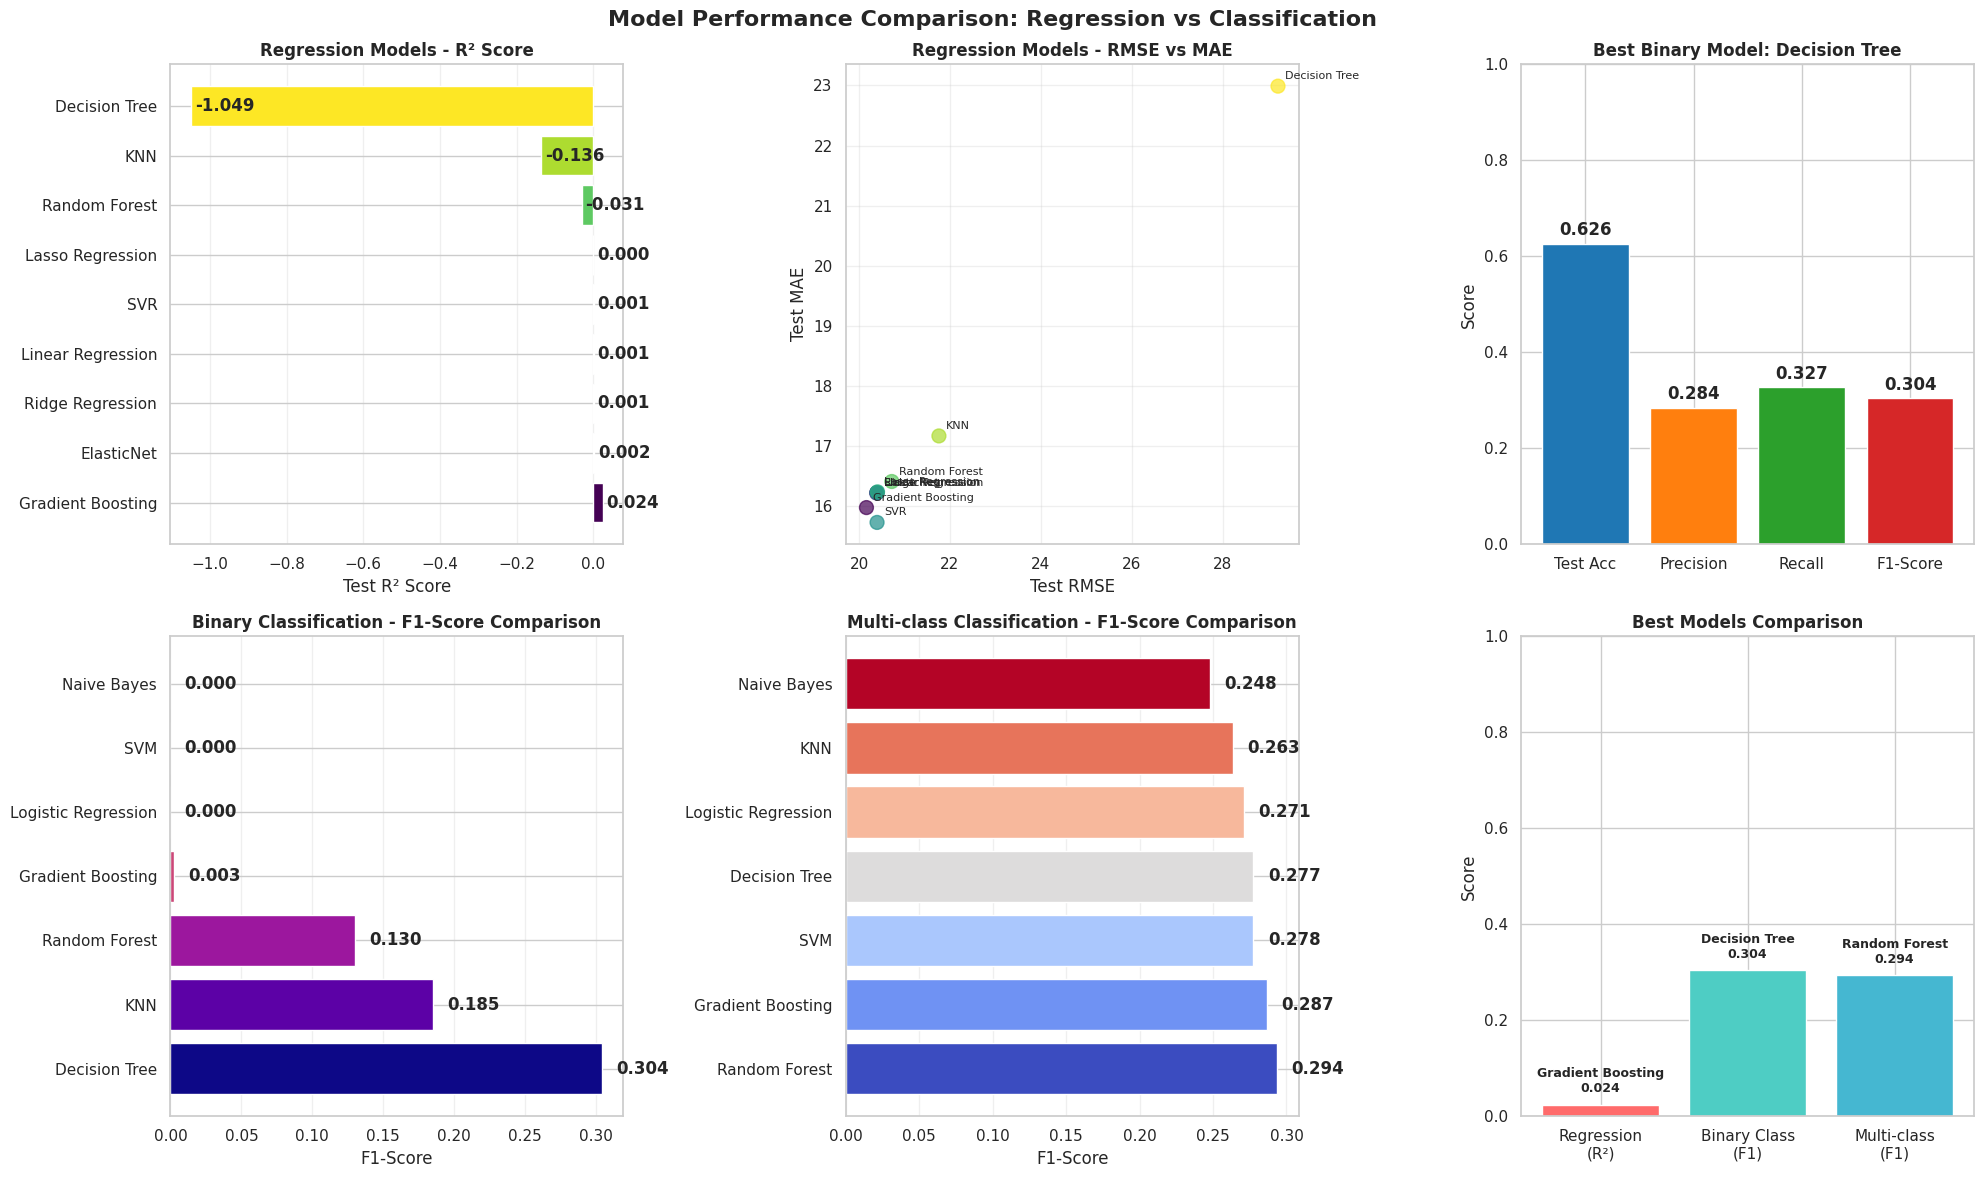

In [54]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Model Performance Comparison: Regression vs Classification', fontsize=16, fontweight='bold')

# 1. Regression Models Performance
ax1 = axes[0, 0]
models = regression_df['Model']
test_r2 = regression_df['Test R²']
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

bars1 = ax1.barh(models, test_r2, color=colors)
ax1.set_xlabel('Test R² Score')
ax1.set_title('Regression Models - R² Score', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, test_r2)):
    ax1.text(value + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', va='center', fontweight='bold')

# 2. Regression RMSE vs MAE
ax2 = axes[0, 1]
ax2.scatter(regression_df['Test RMSE'], regression_df['Test MAE'],
           s=100, c=colors, alpha=0.7)
for i, model in enumerate(regression_df['Model']):
    ax2.annotate(model, (regression_df['Test RMSE'].iloc[i], regression_df['Test MAE'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax2.set_xlabel('Test RMSE')
ax2.set_ylabel('Test MAE')
ax2.set_title('Regression Models - RMSE vs MAE', fontweight='bold')
ax2.grid(alpha=0.3)

# 3. Binary Classification Performance
ax3 = axes[0, 2]
metrics = ['Test Acc', 'Precision', 'Recall', 'F1-Score']
best_binary_scores = [binary_df.iloc[0][metric] for metric in metrics]

bars3 = ax3.bar(metrics, best_binary_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax3.set_ylabel('Score')
ax3.set_title(f'Best Binary Model: {best_binary_model}', fontweight='bold')
ax3.set_ylim(0, 1)

# Add value labels
for bar, value in zip(bars3, best_binary_scores):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Binary Classification F1-Scores Comparison
ax4 = axes[1, 0]
binary_models_list = binary_df['Model']
binary_f1_scores = binary_df['F1-Score']
colors_binary = plt.cm.plasma(np.linspace(0, 1, len(binary_models_list)))

bars4 = ax4.barh(binary_models_list, binary_f1_scores, color=colors_binary)
ax4.set_xlabel('F1-Score')
ax4.set_title('Binary Classification - F1-Score Comparison', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars4, binary_f1_scores):
    ax4.text(value + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', va='center', fontweight='bold')

# 5. Multi-class Classification Performance
ax5 = axes[1, 1]
multiclass_models_list = multiclass_df['Model']
multiclass_f1_scores = multiclass_df['F1-Score']
colors_multi = plt.cm.coolwarm(np.linspace(0, 1, len(multiclass_models_list)))

bars5 = ax5.barh(multiclass_models_list, multiclass_f1_scores, color=colors_multi)
ax5.set_xlabel('F1-Score')
ax5.set_title('Multi-class Classification - F1-Score Comparison', fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars5, multiclass_f1_scores):
    ax5.text(value + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', va='center', fontweight='bold')

# 6. Overall Best Models Comparison
ax6 = axes[1, 2]
best_models = [best_regression_model, best_binary_model, best_multiclass_model]
best_scores = [best_regression_r2, best_binary_f1, best_multiclass_f1]
model_types = ['Regression\n(R²)', 'Binary Class\n(F1)', 'Multi-class\n(F1)']

bars6 = ax6.bar(model_types, best_scores, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax6.set_ylabel('Score')
ax6.set_title('Best Models Comparison', fontweight='bold')
ax6.set_ylim(0, 1)

# Add model names and scores
for i, (bar, model, score) in enumerate(zip(bars6, best_models, best_scores)):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{model}\n{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Save Model

In [55]:
import joblib
import pickle
import os
from datetime import datetime
import json

# Create directory for saving models
model_dir = '/content/drive/MyDrive/DigitalSkola/Final Project/Model/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"✅ Created directory: {model_dir}")
else:
    print(f"✅ Directory already exists: {model_dir}")

# Create timestamp for version control
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
print(f"📅 Timestamp: {timestamp}")

✅ Directory already exists: /content/drive/MyDrive/DigitalSkola/Final Project/Model/
📅 Timestamp: 20250530_112126


In [58]:
# Get best regression model and its details
best_reg_model_obj = regression_results[best_regression_model]['model']
best_reg_metrics = {
    'model_name': best_regression_model,
    'test_r2': regression_results[best_regression_model]['test_r2'],
    'test_rmse': regression_results[best_regression_model]['test_rmse'],
    'test_mae': regression_results[best_regression_model]['test_mae'],
    'cv_r2': regression_results[best_regression_model]['cv_r2'],
    'timestamp': timestamp
}

# Save regression model
reg_model_filename = f"{model_dir}/best_regression_model_{timestamp}.joblib"
joblib.dump(best_reg_model_obj, reg_model_filename)

# Save regression metrics
reg_metrics_filename = f"{model_dir}/best_regression_metrics_{timestamp}.json"
with open(reg_metrics_filename, 'w') as f:
    json.dump(best_reg_metrics, f, indent=4)

print("🔥 BEST REGRESSION MODEL SAVED")
print("=" * 35)
print(f"Model: {best_regression_model}")
print(f"Test R²: {best_reg_metrics['test_r2']:.4f}")
print(f"Saved to: {reg_model_filename}")
print(f"Metrics saved to: {reg_metrics_filename}")

🔥 BEST REGRESSION MODEL SAVED
Model: Gradient Boosting
Test R²: 0.0241
Saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//best_regression_model_20250530_112126.joblib
Metrics saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//best_regression_metrics_20250530_112126.json


In [59]:
# Get best binary classification model and its details
best_binary_model_obj = binary_results[best_binary_model]['model']
best_binary_metrics = {
    'model_name': best_binary_model,
    'test_accuracy': binary_results[best_binary_model]['test_acc'],
    'test_precision': binary_results[best_binary_model]['test_precision'],
    'test_recall': binary_results[best_binary_model]['test_recall'],
    'test_f1': binary_results[best_binary_model]['test_f1'],
    'test_auc': binary_results[best_binary_model]['test_auc'],
    'cv_accuracy': binary_results[best_binary_model]['cv_acc'],
    'timestamp': timestamp
}

# Save binary classification model
binary_model_filename = f"{model_dir}/best_binary_classification_model_{timestamp}.joblib"
joblib.dump(best_binary_model_obj, binary_model_filename)

# Save binary classification metrics
binary_metrics_filename = f"{model_dir}/best_binary_classification_metrics_{timestamp}.json"
with open(binary_metrics_filename, 'w') as f:
    json.dump(best_binary_metrics, f, indent=4)

print("🎯 BEST BINARY CLASSIFICATION MODEL SAVED")
print("=" * 45)
print(f"Model: {best_binary_model}")
print(f"Test F1-Score: {best_binary_metrics['test_f1']:.4f}")
print(f"Saved to: {binary_model_filename}")
print(f"Metrics saved to: {binary_metrics_filename}")

🎯 BEST BINARY CLASSIFICATION MODEL SAVED
Model: Decision Tree
Test F1-Score: 0.3039
Saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//best_binary_classification_model_20250530_112126.joblib
Metrics saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//best_binary_classification_metrics_20250530_112126.json


In [60]:
# Get best multi-class classification model and its details
best_multi_model_obj = multiclass_results[best_multiclass_model]['model']
best_multi_metrics = {
    'model_name': best_multiclass_model,
    'test_accuracy': multiclass_results[best_multiclass_model]['test_acc'],
    'test_precision': multiclass_results[best_multiclass_model]['test_precision'],
    'test_recall': multiclass_results[best_multiclass_model]['test_recall'],
    'test_f1': multiclass_results[best_multiclass_model]['test_f1'],
    'cv_accuracy': multiclass_results[best_multiclass_model]['cv_acc'],
    'timestamp': timestamp
}

# Save multi-class classification model
multi_model_filename = f"{model_dir}/best_multiclass_classification_model_{timestamp}.joblib"
joblib.dump(best_multi_model_obj, multi_model_filename)

# Save multi-class classification metrics
multi_metrics_filename = f"{model_dir}/best_multiclass_classification_metrics_{timestamp}.json"
with open(multi_metrics_filename, 'w') as f:
    json.dump(best_multi_metrics, f, indent=4)

print("🌟 BEST MULTI-CLASS CLASSIFICATION MODEL SAVED")
print("=" * 50)
print(f"Model: {best_multiclass_model}")
print(f"Test F1-Score: {best_multi_metrics['test_f1']:.4f}")
print(f"Saved to: {multi_model_filename}")
print(f"Metrics saved to: {multi_metrics_filename}")

🌟 BEST MULTI-CLASS CLASSIFICATION MODEL SAVED
Model: Random Forest
Test F1-Score: 0.2935
Saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//best_multiclass_classification_model_20250530_112126.joblib
Metrics saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//best_multiclass_classification_metrics_20250530_112126.json


In [61]:
# Create comprehensive model performance summary
model_performance_summary = {
    'timestamp': timestamp,
    'best_models': {
        'regression': {
            'model_name': best_regression_model,
            'metrics': best_reg_metrics
        },
        'binary_classification': {
            'model_name': best_binary_model,
            'metrics': best_binary_metrics
        },
        'multiclass_classification': {
            'model_name': best_multiclass_model,
            'metrics': best_multi_metrics
        }
    },
    'all_model_results': {
        'regression': regression_df.to_dict('records'),
        'binary_classification': binary_df.to_dict('records'),
        'multiclass_classification': multiclass_df.to_dict('records')
    },
    'data_info': {
        'total_samples': len(df_final),
        'training_samples': len(X_train_reg),
        'test_samples': len(X_test_reg),
        'n_features': len(X_final.columns),
        'target_distribution': {
            'regression_min': float(y_regression.min()),
            'regression_max': float(y_regression.max()),
            'regression_mean': float(y_regression.mean()),
            'binary_class_balance': float(y_binary.mean()),
            'multiclass_distribution': y_multiclass.value_counts().to_dict()
        }
    }
}

# Save comprehensive summary
summary_filename = f"{model_dir}/model_performance_summary_{timestamp}.json"
with open(summary_filename, 'w') as f:
    json.dump(model_performance_summary, f, indent=4)

print("📊 MODEL PERFORMANCE SUMMARY SAVED")
print("=" * 40)
print(f"Summary saved to: {summary_filename}")

📊 MODEL PERFORMANCE SUMMARY SAVED
Summary saved to: /content/drive/MyDrive/DigitalSkola/Final Project/Model//model_performance_summary_20250530_112126.json


In [62]:
df_cleaned.to_csv('/content/drive/MyDrive/DigitalSkola/Final Project/Song_data_cleaned.csv', index=False)

# Model Deploy